In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel("IMPORTACION-VOLUMEN-2024-05.xlsx")

# Eliminar filas completamente vacías
df_cleaned = df.dropna(how='all')

# Eliminar columnas completamente vacías
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# Usar la fila 5 como encabezado
df_cleaned.columns = df_cleaned.iloc[1]

# Eliminar filas anteriores a la fila de encabezado
df_cleaned = df_cleaned[2:]

# Resetear el índice
df_cleaned.reset_index(drop=True, inplace=True)

file_name = "depurado.csv"
# Guardar el DataFrame depurado en un archivo CSV
df_cleaned.to_csv(file_name, index=False)

print(f"Archivo depurado guardado como {file_name}")

Archivo depurado guardado como depurado.csv


In [3]:
data = pd.read_csv("depurado.csv")
data

Fecha  Aceites lubricantes  \
0                                  2001-01-01 00:00:00                 0.00   
1                                  2001-02-01 00:00:00                 0.00   
2                                  2001-03-01 00:00:00                 0.00   
3                                  2001-04-01 00:00:00                 0.00   
4                                  2001-05-01 00:00:00                 0.00   
..                                                 ...                  ...   
278                                2024-03-01 00:00:00             27993.04   
279                                2024-04-01 00:00:00             37444.60   
280                                2024-05-01 00:00:00             31035.55   
281  Fuente: informes mensuales de titulares de lic...                  NaN   
282  Nota: Información sujeta a actualización por p...                  NaN   

     Asfalto      Bunker  Ceras  Combustible turbo jet  Diesel bajo azufre  \
0    27748.99  214581.84   0.00                   0.00                0.00   
1     7503.57  294609.00   0.00                   0.00                0.00   
2    26304.32  315263.80   0.00                   0.00                0.00   
3     7885.89  205653.00   0.00                   0.00                0.00   
4     8443.16  278371.30   0.00                   0.00                0.00   
..        ...        ...    ...                    ...                 ...   
278   5633.41  163119.06   0.00              105710.45          1477038.00   
279   7990.99   77253.65  33.52               85752.17          1294706.12   
280  10483.78  544682.15  91.83               94606.00          1470870.09   
281       NaN        NaN    NaN                    NaN                 NaN   
282       NaN        NaN    NaN                    NaN                 NaN   

     Diesel ultra bajo azufre  Gas licuado de petróleo  Gasolina de aviación  \
0                        0.00            194065.738095                820.00   
1                        0.00            170703.380952               3054.00   
2                        0.00            161837.371429                677.00   
3                        0.00            163048.642857               3399.00   
4                        0.00            171518.861905                585.00   
..                        ...                      ...                   ...   
278                   5007.48            675157.480000                  0.00   
279                      0.00            473940.660000               3351.23   
280                      0.00            684864.460000                  0.00   
281                       NaN                      NaN                   NaN   
282                       NaN                      NaN                   NaN   

     ...  Naftas    Petcoke  Petróleo crudo  Solventes  Butano  \
0    ...    0.00       0.00             0.0       0.00     0.0   
1    ...    0.00       0.00             0.0       0.00     0.0   
2    ...    0.00       0.00             0.0       0.00     0.0   
3    ...    0.00       0.00             0.0       0.00     0.0   
4    ...    0.00       0.00             0.0       0.00     0.0   
..   ...     ...        ...             ...        ...     ...   
278  ...  263.28  523701.86          2869.0    3782.28     0.0   
279  ...   40.00       0.00          7802.0   23555.38     0.0   
280  ...  242.22  518800.00          3845.0   14929.21     0.0   
281  ...     NaN        NaN             NaN        NaN     NaN   
282  ...     NaN        NaN             NaN        NaN     NaN   

     Diesel alto azufre     MTBE  Orimulsión  Petróleo reconstituido  \
0             566101.99   8402.0         0.0                715344.0   
1             489525.80      0.0         0.0                370166.0   
2             575559.68      0.0         0.0                360530.0   
3             437745.42   8184.0         0.0                359527.0   
4             552609.13  12680.0         0.0     

In [4]:
# Obtén los encabezados
headers = list(data.columns)

headers

['Fecha',
 'Aceites lubricantes',
 'Asfalto ',
 'Bunker',
 'Ceras',
 'Combustible turbo jet',
 'Diesel bajo azufre',
 'Diesel ultra bajo azufre',
 'Gas licuado de petróleo',
 'Gasolina de aviación',
 'Gasolina regular',
 'Gasolina superior',
 'Grasas lubricantes',
 'Kerosina',
 'Mezclas oleosas',
 'Naftas',
 'Petcoke',
 'Petróleo crudo',
 'Solventes',
 'Butano',
 'Diesel alto azufre',
 'MTBE',
 'Orimulsión',
 'Petróleo reconstituido',
 'Total importación']

In [5]:
data_cleaned = data.dropna()
data_cleaned.to_csv(f"{file_name}")

# EDA

In [6]:
data = pd.read_csv("depurado.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                280 non-null    int64  
 1   Fecha                     280 non-null    object 
 2   Aceites lubricantes       280 non-null    float64
 3   Asfalto                   280 non-null    float64
 4   Bunker                    280 non-null    float64
 5   Ceras                     280 non-null    float64
 6   Combustible turbo jet     280 non-null    float64
 7   Diesel bajo azufre        280 non-null    float64
 8   Diesel ultra bajo azufre  280 non-null    float64
 9   Gas licuado de petróleo   280 non-null    float64
 10  Gasolina de aviación      280 non-null    float64
 11  Gasolina regular          280 non-null    float64
 12  Gasolina superior         280 non-null    float64
 13  Grasas lubricantes        280 non-null    float64
 14  Kerosina  

In [7]:
data.describe()

Unnamed: 0  Aceites lubricantes      Asfalto         Bunker  \
count  280.000000           280.000000    280.000000  2.800000e+02   
mean   139.550000          5832.005926   7181.473947  2.900936e+05   
std     81.055919         11131.775557   6470.584885  1.727460e+05   
min      0.000000             0.000000      0.000000  8.484760e+03   
25%     69.750000             0.000000   2842.630000  1.540347e+05   
50%    139.500000             0.000000   5466.715000  2.757767e+05   
75%    209.250000             0.000000  10039.453571  4.020608e+05   
max    280.000000         46934.140000  48364.500000  1.051764e+06   

            Ceras  Combustible turbo jet  Diesel bajo azufre  \
count  280.000000             280.000000        2.800000e+02   
mean    67.453036           25881.526321        3.099915e+05   
std    167.201657           40405.949124        5.217152e+05   
min      0.000000               0.000000        0.000000e+00   
25%      0.000000               0.000000        0.000000e+00   
50%      0.000000               0.000000        0.000000e+00   
75%      0.000000           52584.010000        7.914933e+05   
max    920.120000          158719.360000        1.592580e+06   

       Diesel ultra bajo azufre  Gas licuado de petróleo  \
count                280.000000             2.800000e+02   
mean                2859.782429             4.080441e+05   
std                 8730.814372             1.968704e+05   
min                    0.000000             1.005615e+05   
25%                    0.000000             2.241630e+05   
50%                    0.000000             4.095000e+05   
75%                    0.000000             5.625798e+05   
max                48945.910000             1.077123e+06   

       Gasolina de aviación  ...      Naftas        Petcoke  Petróleo crudo  \
count            280.000000  ...  280.000000     280.000000      280.000000   
mean            2184.694107  ...   22.280893  142811.986661      182.697036   
std             4691.166087  ...   79.318294  187195.229978      758.795275   
min                0.000000  ...    0.000000       0.000000        0.000000   
25%                0.000000  ...    0.000000       0.000000        0.000000   
50%              381.000000  ...    0.000000  145142.635000        0.000000   
75%             2736.150000  ...    0.000000  181081.381250        0.000000   
max            27979.070000  ...  513.830000  882244.120000     7802.000000   

          Solventes      Butano  Diesel alto azufre          MTBE  \
count    280.000000  280.000000        2.800000e+02    280.000000   
mean    2511.036786   10.690500        5.699538e+05    508.814286   
std     5575.144096   31.267537        4.045484e+05   2605.278173   
min        0.000000    0.000000        0.000000e+00      0.000000   
25%        0.000000    0.000000        0.000000e+00      0.000000   
50%        0.000000    0.000000        6.672887e+05      0.000000   
75%        0.000000    0.000000        8.460810e+05      0.000000   
max    24765.010000  149.090000        1.595699e+06  19431.000000   

         Orimulsión  Petróleo reconstituido  Total importación  
count     280.00000              280.000000       2.800000e+02  
mean    14646.78625            34954.289286       2.741575e+06  
std     66660.21826           134319.754754       7.745967e+05  
min         0.00000                0.000000       1.381787e+06  
25%         0.00000                0.000000       2.113291e+06  
50%         0.00000                0.000000       2.597630e+06  
75%         0.00000                0.000000       3.236020e+06  
max    344685.00000           730957.000000       5.013967e+06  

[8 rows x 25 columns]

In [8]:
columns_interes = ['Diesel bajo azufre',
'Diesel ultra bajo azufre',
'Gas licuado de petróleo',
'Gasolina regular',
'Gasolina superior',
'Diesel alto azufre']

# Transformar los datos de formato ancho a largo

In [9]:
# Conversion de la fecha
data['Fecha'] = pd.to_datetime(data['Fecha'])  # Convierte la columna de fecha a datetime

# Extrae mes y año
data['mes'] = data['Fecha'].dt.month
data['año'] = data['Fecha'].dt.year

In [10]:
df_combustibles = data[['Fecha', 'año', 'mes'] + columns_interes]

In [11]:
# Transforma el DataFrame a formato largo
df_long = pd.melt(df_combustibles, id_vars=['Fecha', 'año', 'mes'], 
                  value_vars=columns_interes, 
                  var_name='tipo_combustible', 
                  value_name='importaciones')
df_long

Fecha   año  mes    tipo_combustible  importaciones
0    2001-01-01  2001    1  Diesel bajo azufre            0.0
1    2001-02-01  2001    2  Diesel bajo azufre            0.0
2    2001-03-01  2001    3  Diesel bajo azufre            0.0
3    2001-04-01  2001    4  Diesel bajo azufre            0.0
4    2001-05-01  2001    5  Diesel bajo azufre            0.0
...         ...   ...  ...                 ...            ...
1675 2024-01-01  2024    1  Diesel alto azufre            0.0
1676 2024-02-01  2024    2  Diesel alto azufre            0.0
1677 2024-03-01  2024    3  Diesel alto azufre            0.0
1678 2024-04-01  2024    4  Diesel alto azufre            0.0
1679 2024-05-01  2024    5  Diesel alto azufre            0.0

[1680 rows x 5 columns]

# Comprobación de la distribución normal

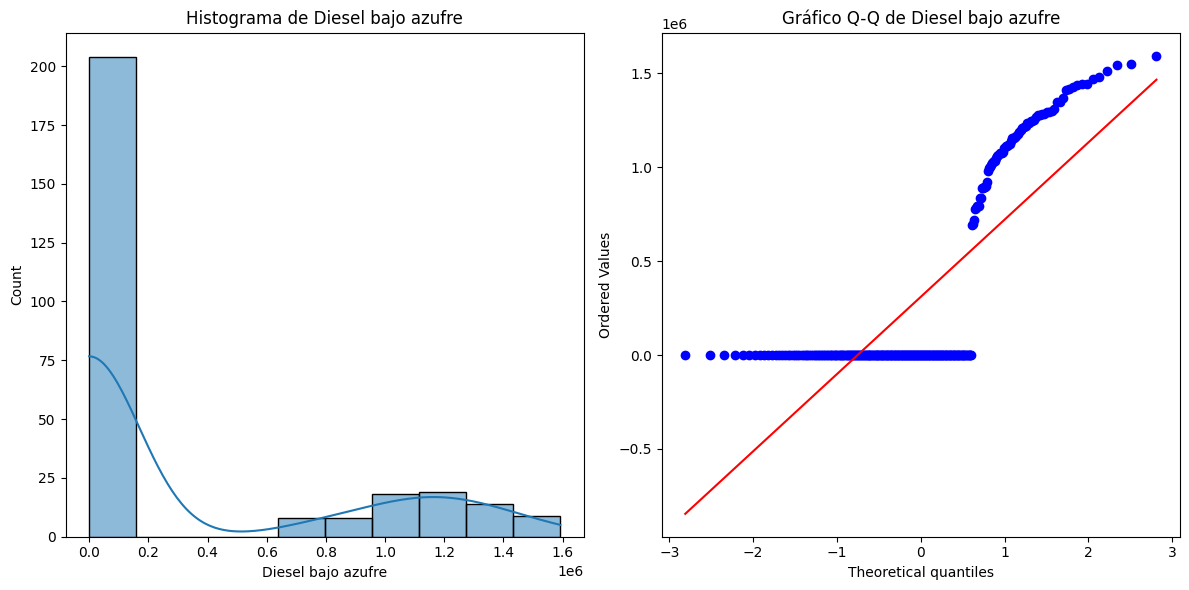

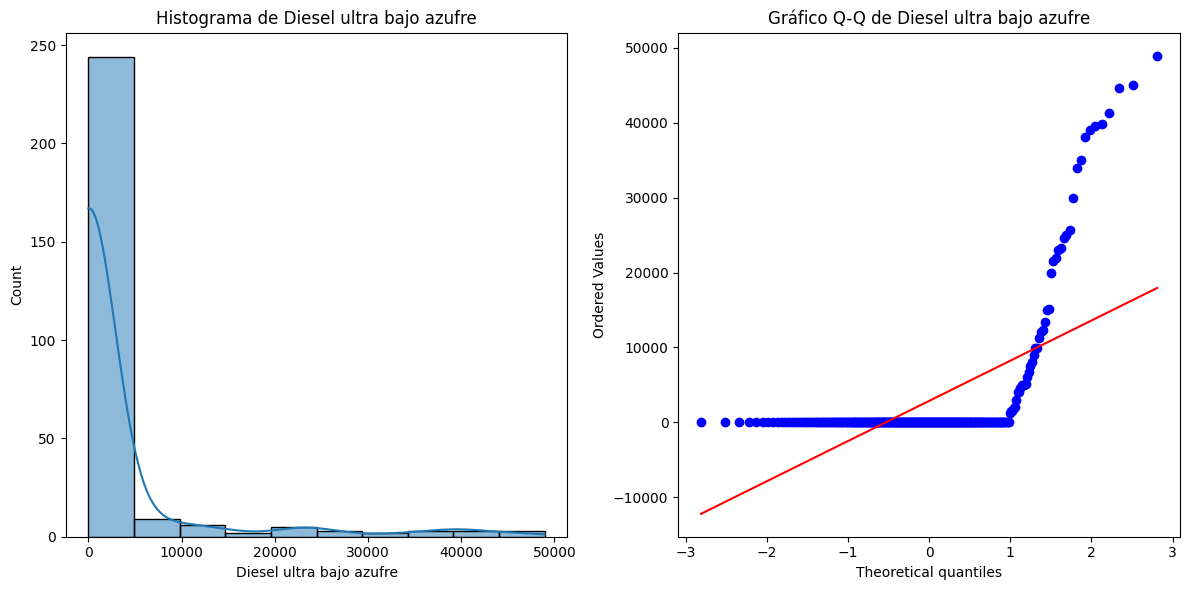

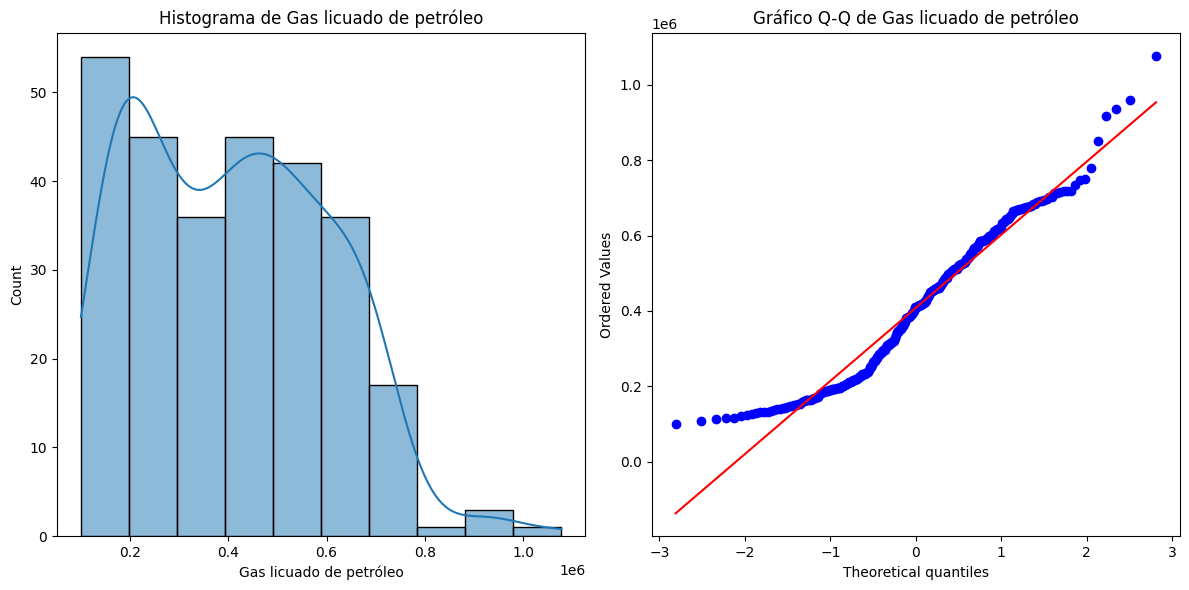

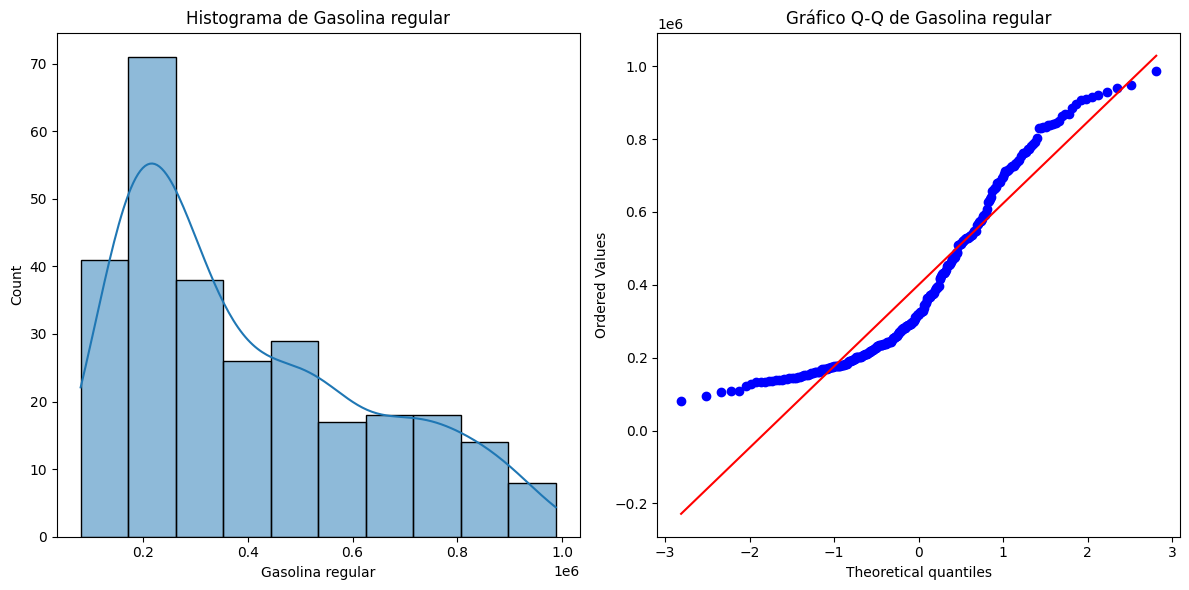

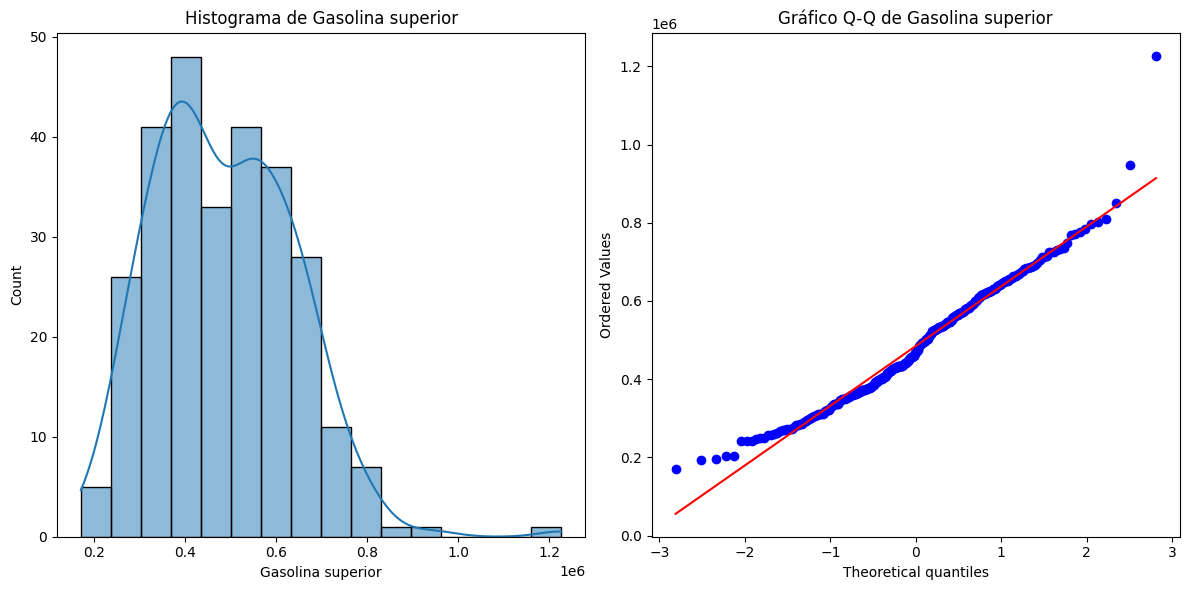

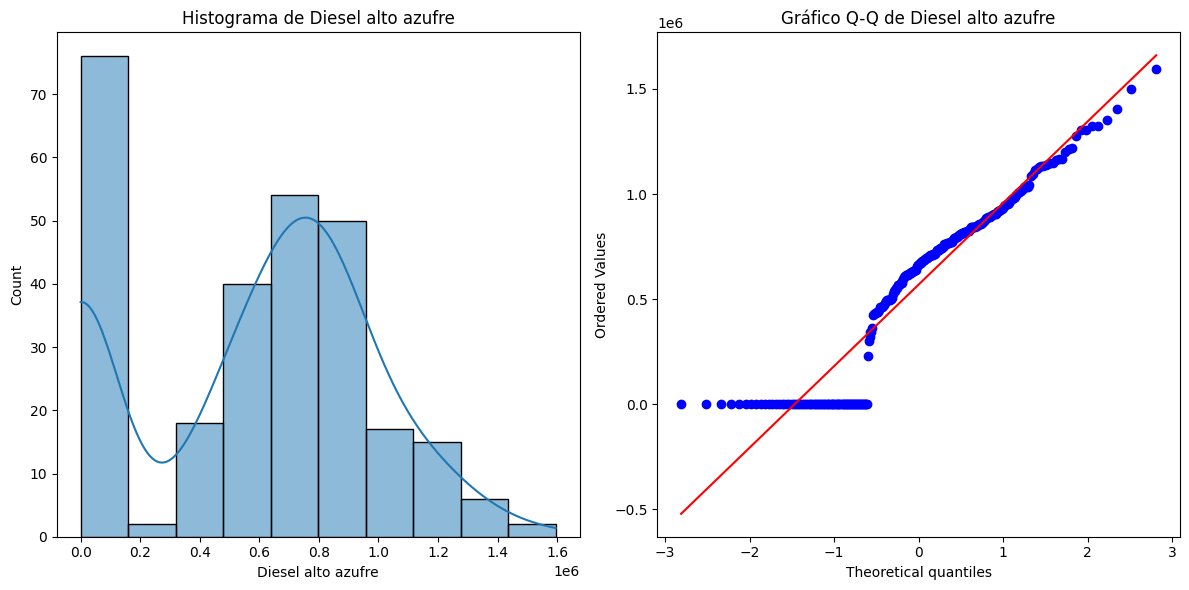

In [12]:
# Histograma y gráfico Q-Q
for column in columns_interes:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histograma de {column}')

    # Gráfico Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {column}')

    plt.tight_layout()
    plt.show()

# Análisis de la importación por meses y años

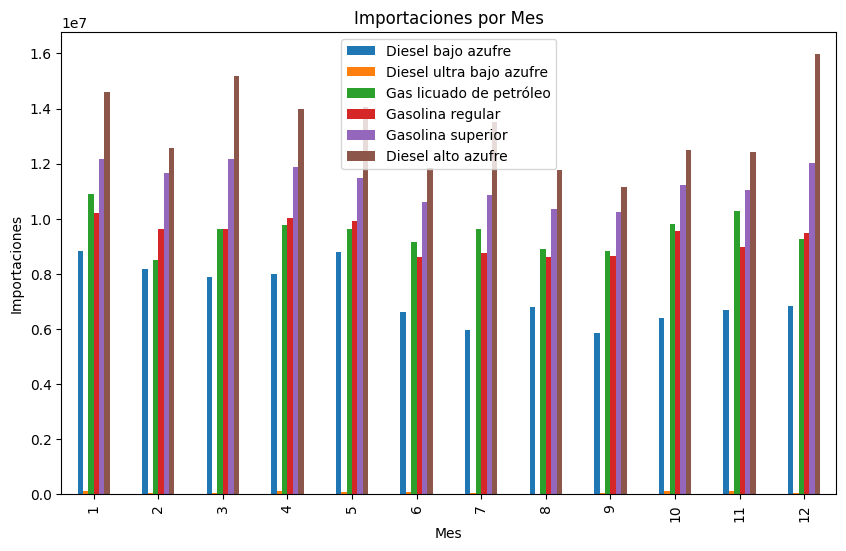

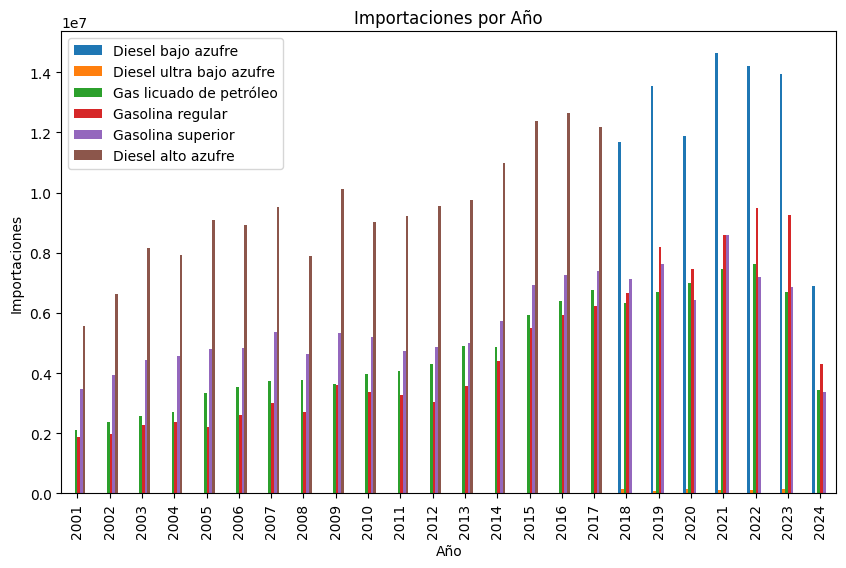

In [13]:
# Convierte la columna de fecha a datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Extrae mes y año
data['mes'] = data['Fecha'].dt.month
data['año'] = data['Fecha'].dt.year

# Suma de importaciones por mes
importaciones_por_mes = data.groupby('mes')[columns_interes].sum()

# Suma de importaciones por año
importaciones_por_año = data.groupby('año')[columns_interes].sum()

# Gráficos de barras
importaciones_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Importaciones')
plt.show()

importaciones_por_año.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Año')
plt.xlabel('Año')
plt.ylabel('Importaciones')
plt.show()


# Análisis de picos en importaciones por año y tipo de combustible

In [14]:
# Encuentra los picos por año y tipo de combustible
picos_por_año = df_long.groupby(['año', 'tipo_combustible'])['importaciones'].max().unstack()

picos_por_año

tipo_combustible  Diesel alto azufre  Diesel bajo azufre  \
año                                                        
2001                      575559.680                0.00   
2002                      703749.810                0.00   
2003                      873103.096                0.00   
2004                      809194.950                0.00   
2005                     1212610.530                0.00   
2006                     1220719.640                0.00   
2007                     1118432.250                0.00   
2008                     1095743.350                0.00   
2009                     1144960.660                0.00   
2010                     1135293.920                0.00   
2011                     1033948.690                0.00   
2012                     1324780.960                0.00   
2013                     1202187.850                0.00   
2014                     1595698.560                0.00   
2015                     1324421.960                0.00   
2016                     1498844.950                0.00   
2017                     1406022.430                0.00   
2018                           0.000          1592580.34   
2019                           0.000          1550052.84   
2020                           0.000          1367335.14   
2021                           0.000          1542473.57   
2022                           0.000          1438571.28   
2023                           0.000          1509634.28   
2024                           0.000          1477038.00   

tipo_combustible  Diesel ultra bajo azufre  Gas licuado de petróleo  \
año                                                                   
2001                                  0.00             2.060228e+05   
2002                                  0.00             2.275959e+05   
2003                                  0.00             2.375323e+05   
2004                                  0.00             2.786885e+05   
2005                                  0.00             4.619572e+05   
2006                                  0.00             4.920634e+05   
2007                                  0.00             5.532520e+05   
2008                                  0.00             5.226705e+05   
2009                                  0.00             5.434985e+05   
2010                                  0.00             5.406719e+05   
2011                                  0.00             5.656279e+05   
2012                                  0.00             5.693459e+05   
2013                                  0.00             5.753185e+05   
2014                                  0.00             5.547843e+05   
2015                                  0.00             6.373165e+05   
2016                                  0.00             7.489706e+05   
2017                                  0.00             9.359865e+05   
2018                              39035.84             6.442454e+05   
2019                              39866.57             8.507782e+05   
2020                              48945.91             9.608405e+05   
2021                              41348.99             7.460025e+05   
2022                              25727.21             7.352537e+05   
2023                              45074.97             1.077123e+06   
2024                               6710.98             9.165417e+05   

tipo_combustible  Gasolina regular  Gasolina superior  
año                                                    
2001                     233643.75          373963.96  
2002                     222408.00          440677.81  
2003                     269981.86          459025.69  
2004                     275539.38          486880.82  
2005                     266018.37          566618.55  
2006                     366193.77          711860.77  
2007                     351306.27          545587.63  
2008                     358036.44          570256.98  
2009                     588346.

# Comportamiento durante los últimos X años y durante la pandemia

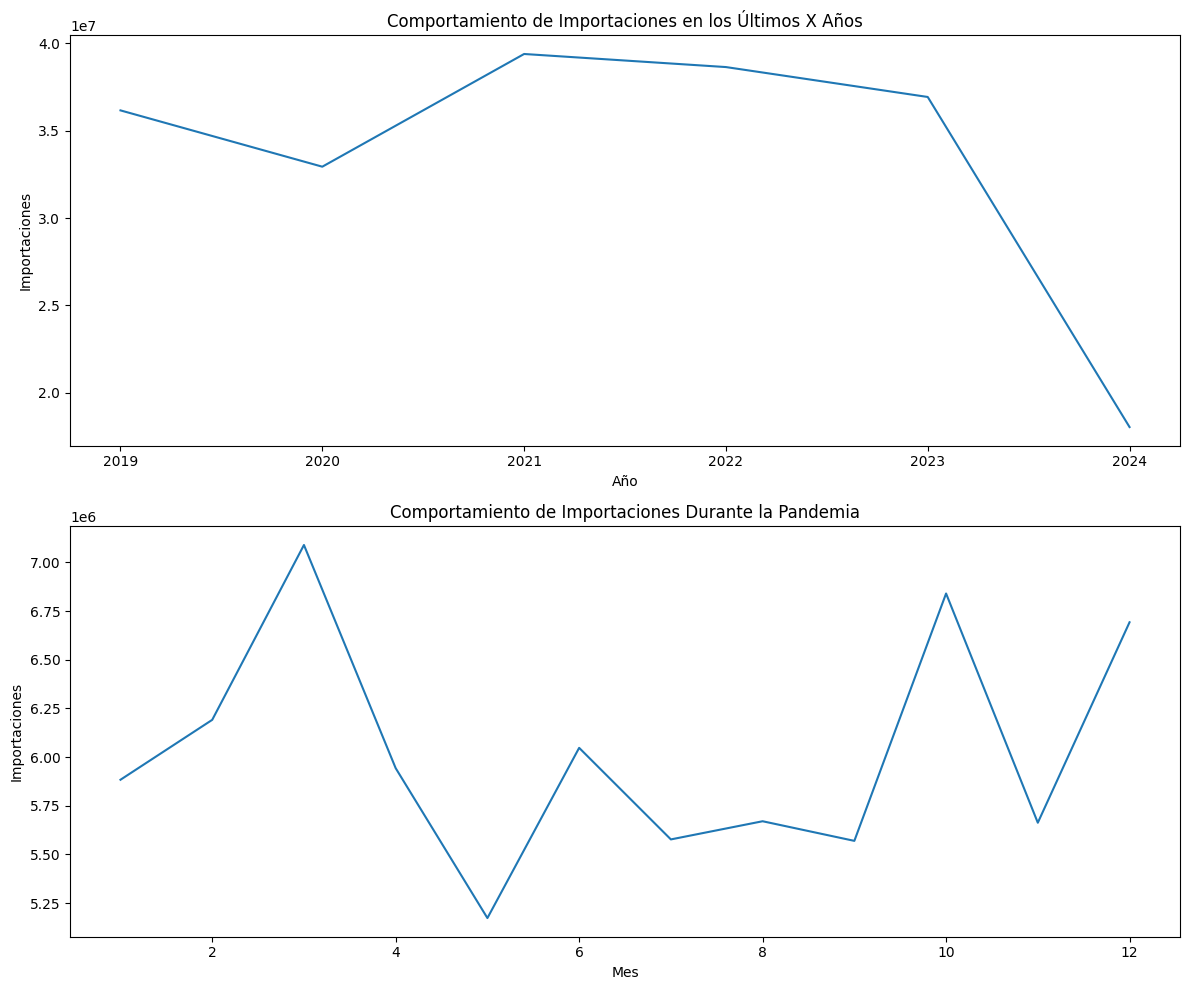

In [15]:
# Filtra los datos para los últimos X años
X = 5  # Define el número de años que quieres analizar
ultimos_x_años = df_long[df_long['año'] >= df_long['año'].max() - X]

# Comportamiento durante la pandemia (asumiendo 2020 y 2021 como años de pandemia)
pandemia = df_long[df_long['año'].isin([2020, 2021])]

# Gráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Últimos X años
ultimos_x_años.groupby('año')['importaciones'].sum().plot(kind='line', ax=ax[0])
ax[0].set_title('Comportamiento de Importaciones en los Últimos X Años')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Importaciones')

# Durante la pandemia
pandemia.groupby('mes')['importaciones'].sum().plot(kind='line', ax=ax[1])
ax[1].set_title('Comportamiento de Importaciones Durante la Pandemia')
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('Importaciones')

plt.tight_layout()
plt.show()


# Análisis detallado del comportamiento por tipo de combustible

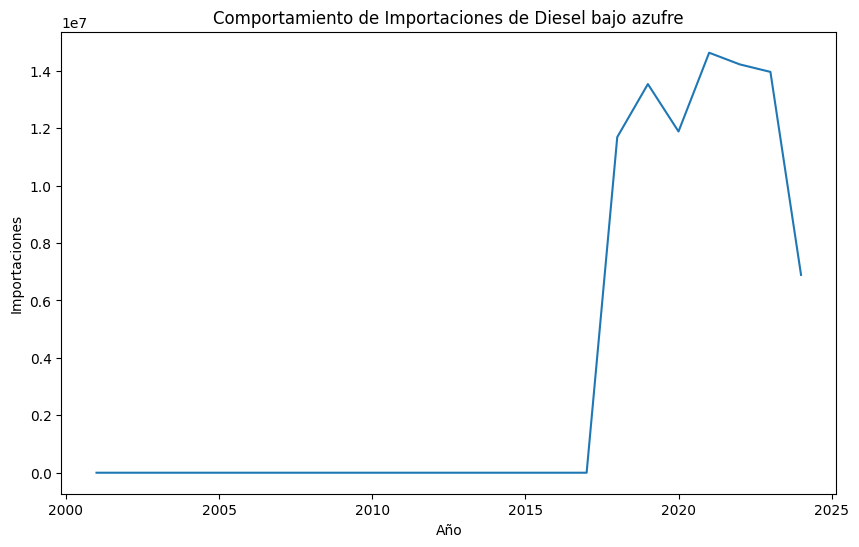

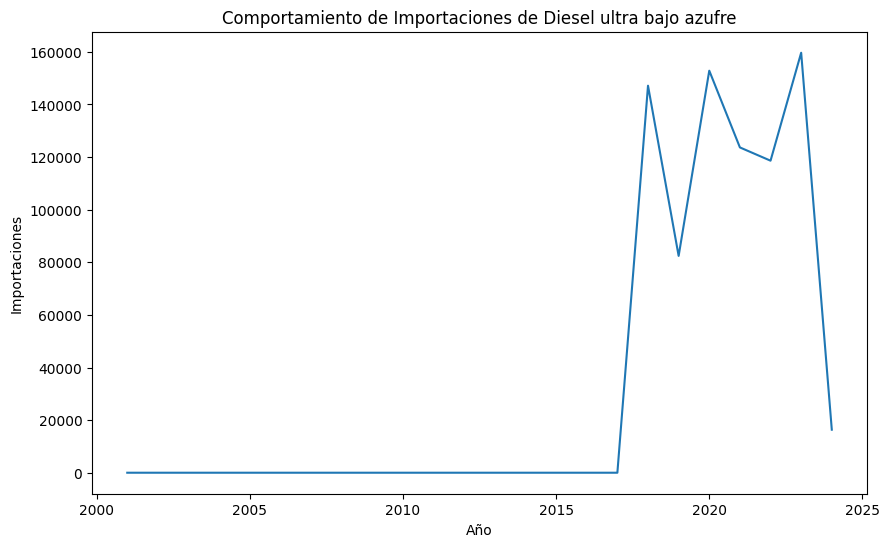

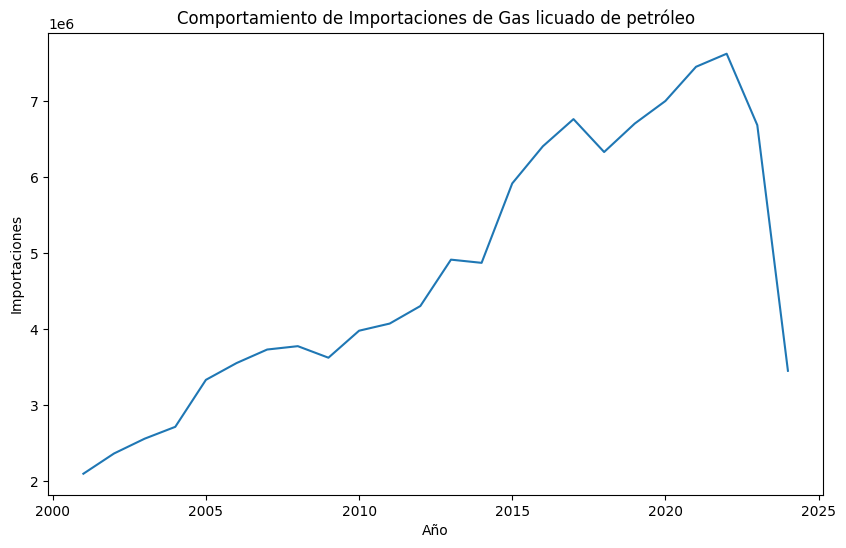

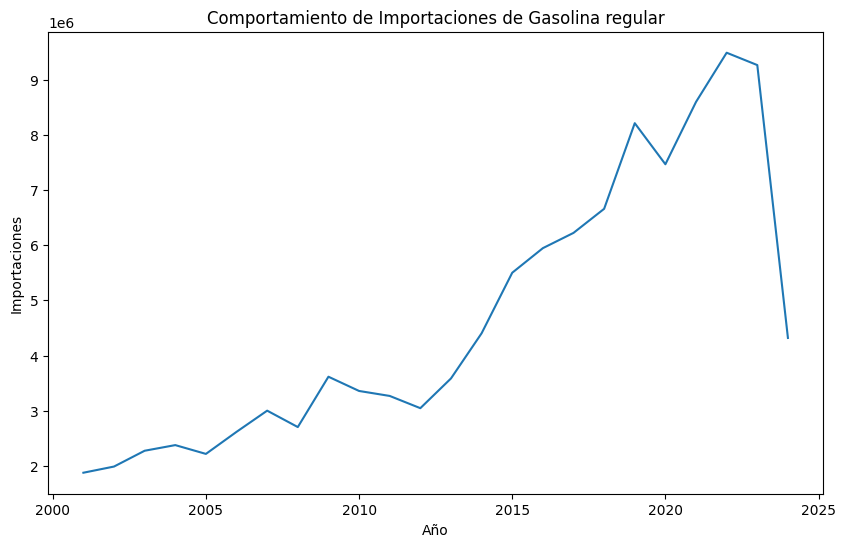

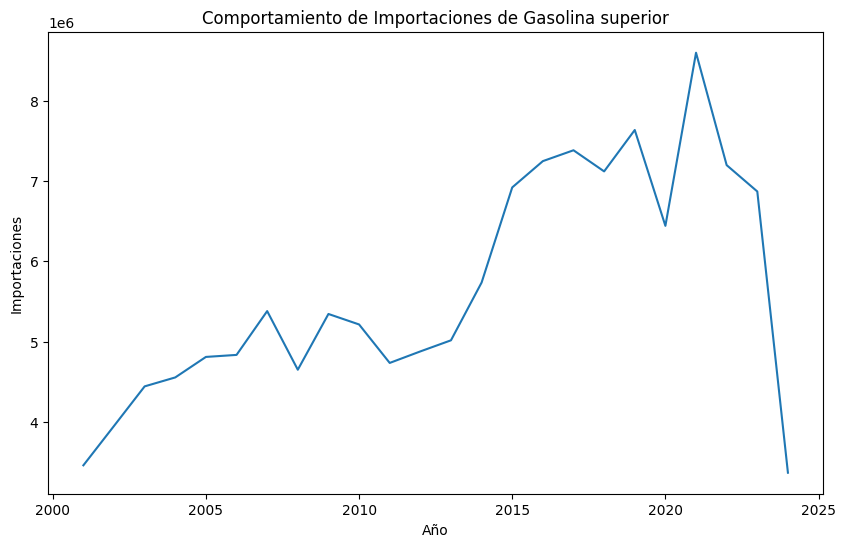

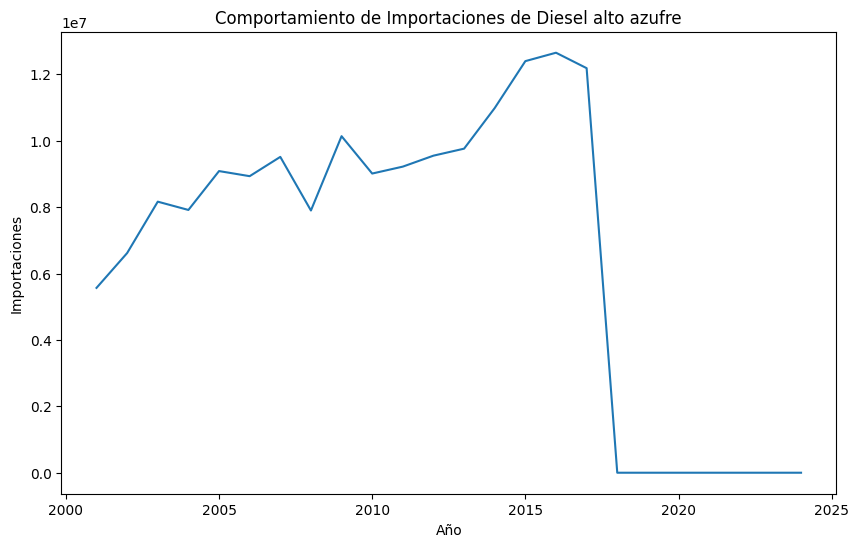

In [16]:
# Gráficos de líneas para cada tipo de combustible
for column in columns_interes:
    plt.figure(figsize=(10, 6))
    data.groupby('año')[column].sum().plot(kind='line')
    plt.title(f'Comportamiento de Importaciones de {column.capitalize()}')
    plt.xlabel('Año')
    plt.ylabel('Importaciones')
    plt.show()


# Análisis de la importación por meses y años

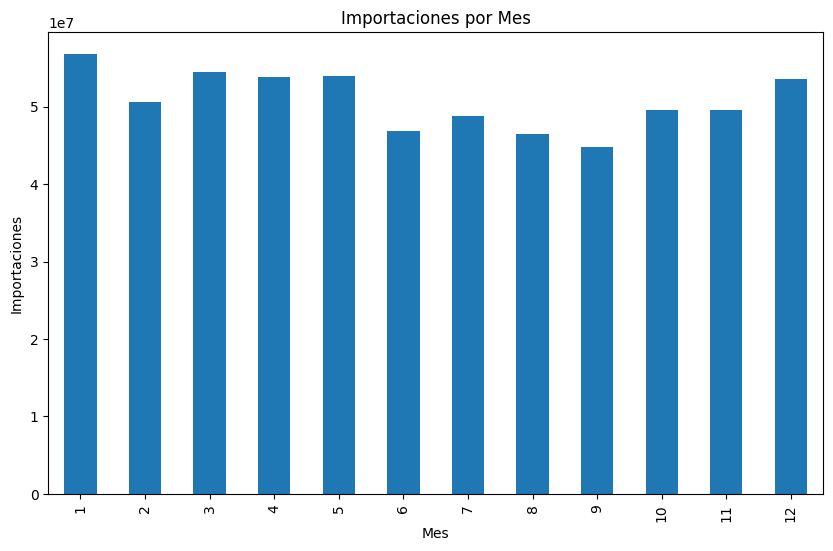

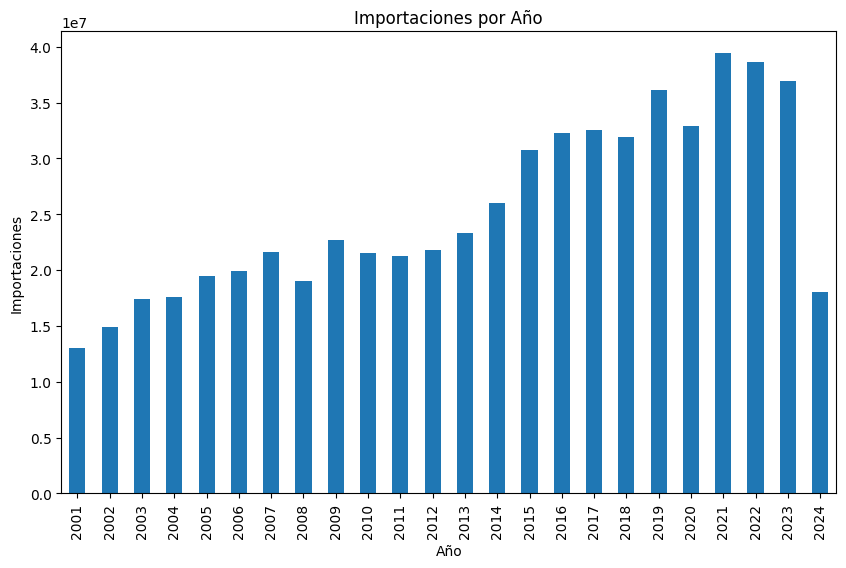

In [17]:
# Suma de importaciones por mes
importaciones_por_mes = df_long.groupby('mes')['importaciones'].sum()

# Suma de importaciones por año
importaciones_por_año = df_long.groupby('año')['importaciones'].sum()

# Gráficos de barras
importaciones_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Importaciones')
plt.show()

importaciones_por_año.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Año')
plt.xlabel('Año')
plt.ylabel('Importaciones')
plt.show()


# FIN EDA

# 2 Trabajar con tres de las series proporcionadas, asegurando que al menos una de ellas esté relacionada con la estimación de precios.

In [18]:
# Cargar y preparar datos
data = pd.read_csv("depurado.csv")
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

# Selección de series
series_consumo = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_importacion = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_precios = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]


# 3 Especificar inicio, fin y frecuencia

#### 1 Especificar Inicio, Fin y Frecuencia:

In [19]:
# Especificar inicio, fin y frecuencia
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        inicio = serie.index.min()
        fin = serie.index.max()
        frecuencia = pd.infer_freq(serie.index)
        print(f'{nombre} de {column} - Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}')


Consumo de Gasolina superior - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Consumo de Gasolina regular - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Consumo de Diesel bajo azufre - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Consumo de Gas licuado de petróleo - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Gasolina superior - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Gasolina regular - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Diesel bajo azufre - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Gas licuado de petróleo - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Precios de Gasolina superior - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Precios de Gasolina regular - Inicio: 2001-01

#### 2 Hacer un gráfico de la serie y explicar la información que se puede obtener a primera vista:

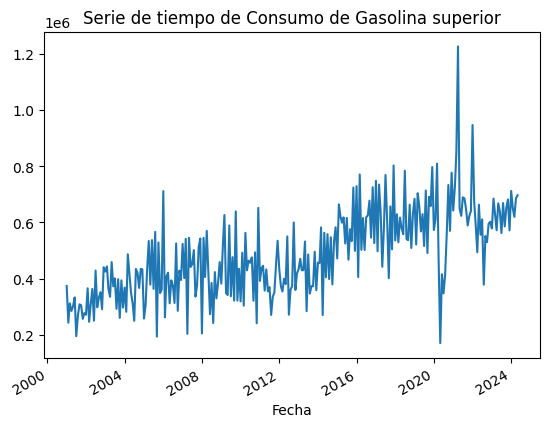

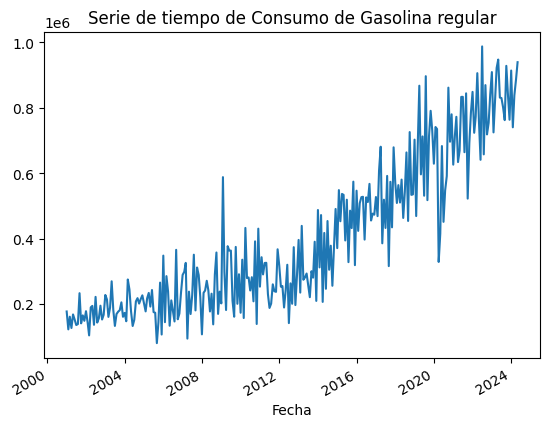

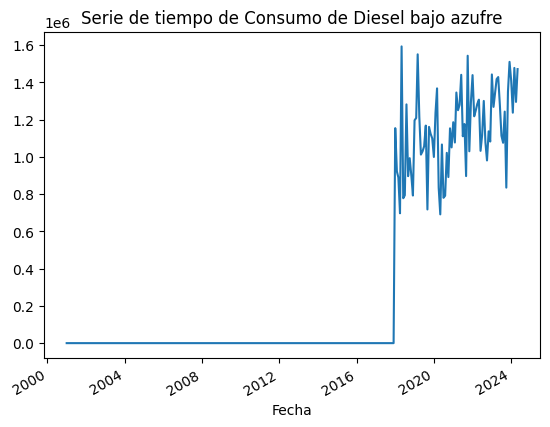

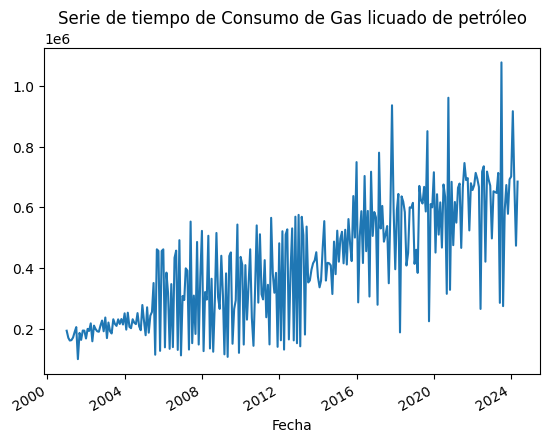

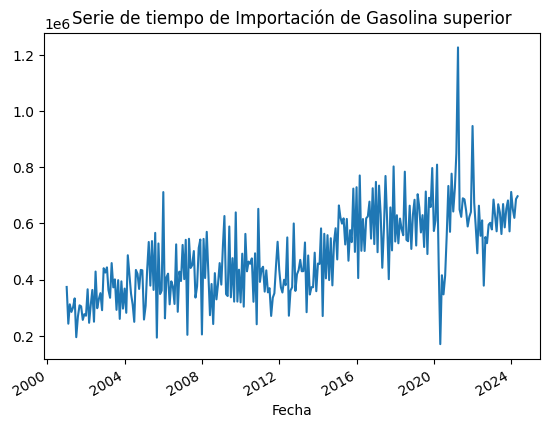

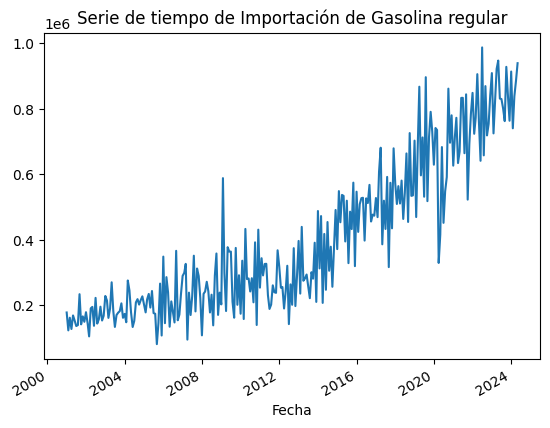

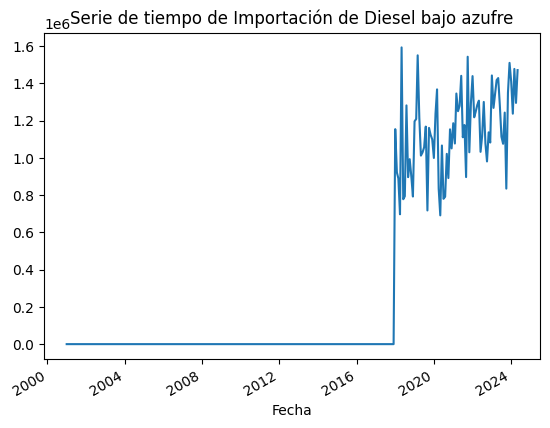

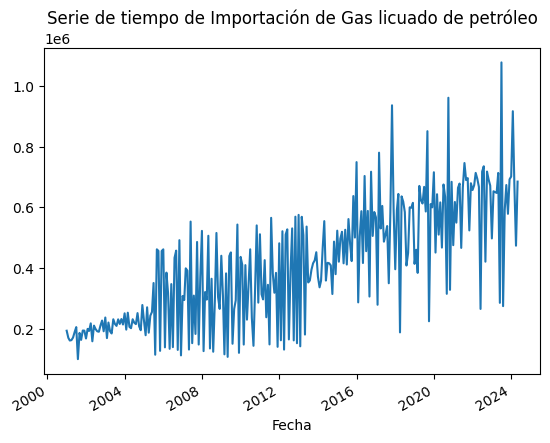

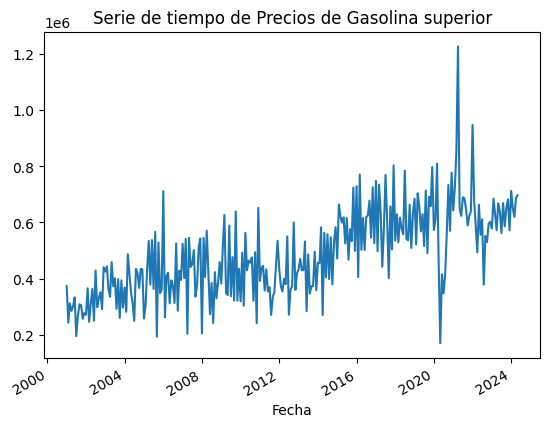

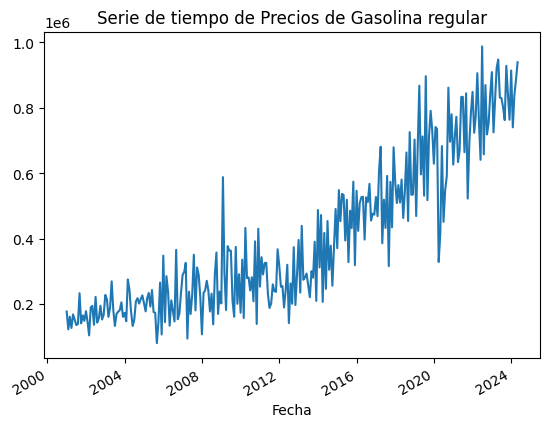

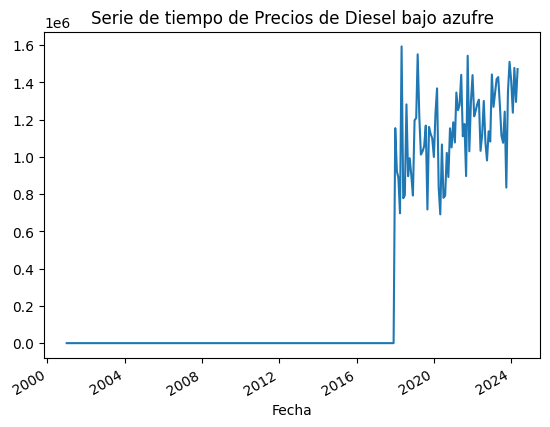

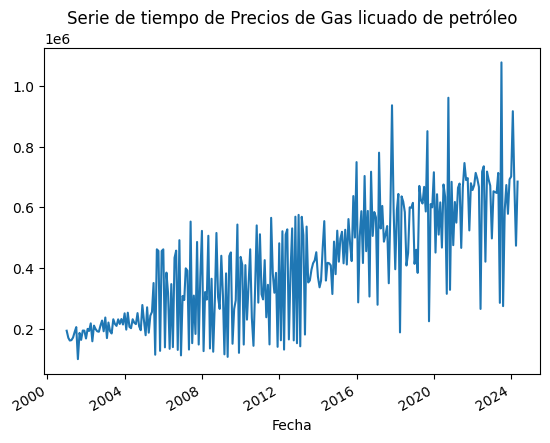

In [20]:
# Graficar las series
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        serie[column].plot(title=f"Serie de tiempo de {nombre} de {column}")
        plt.show()


#### 3 Descomponer la serie y discutir la estacionariedad en media y varianza:

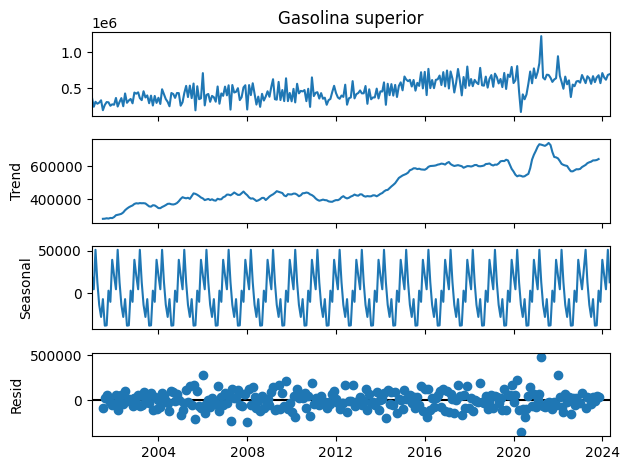

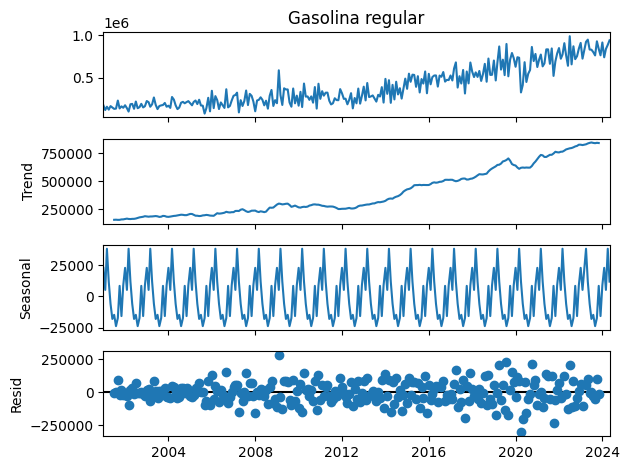

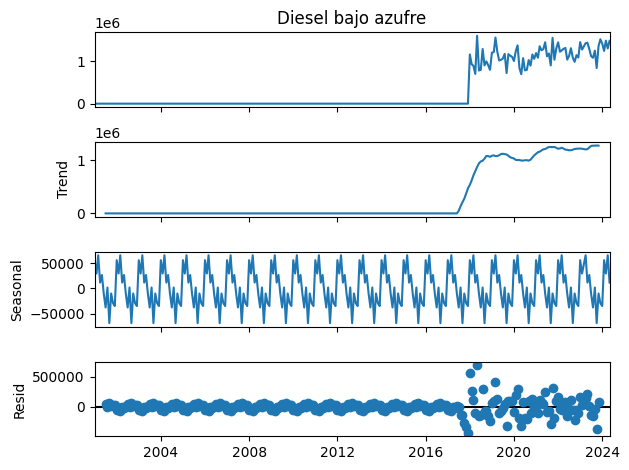

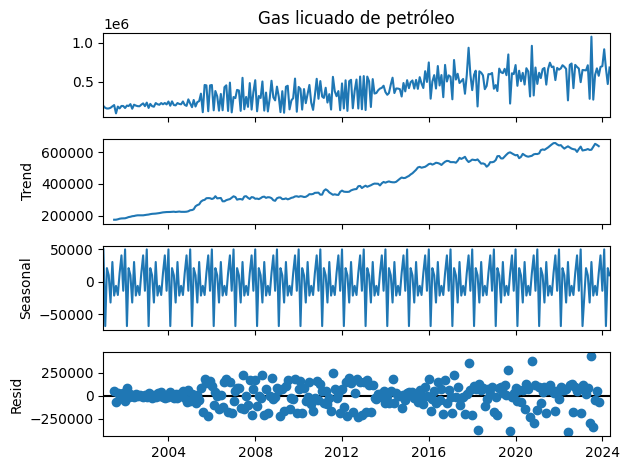

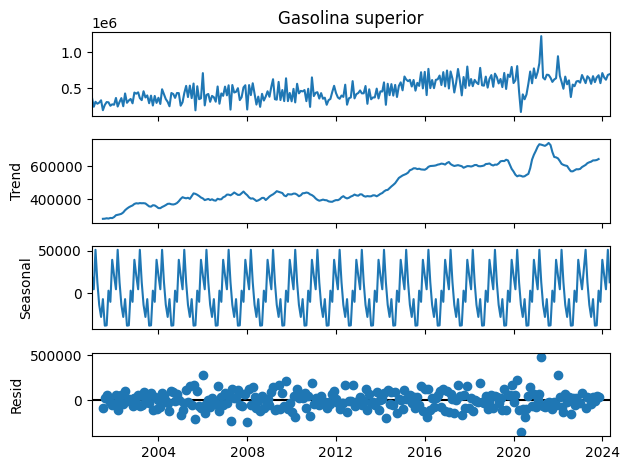

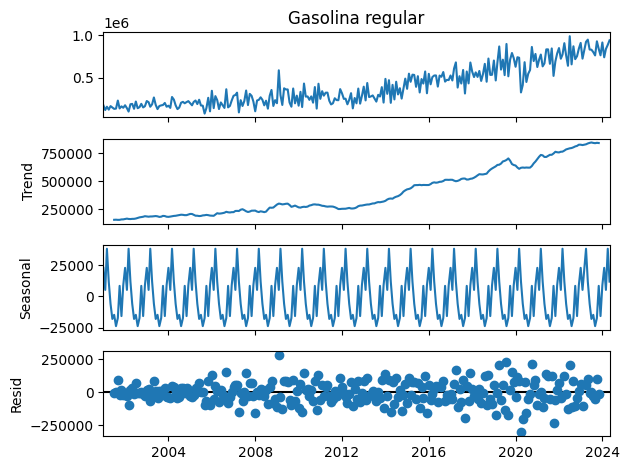

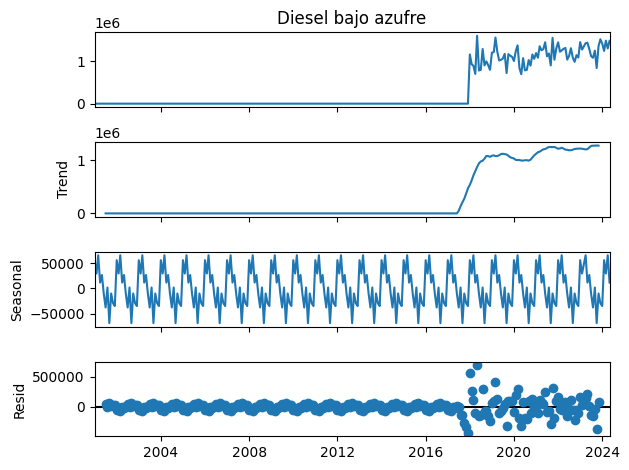

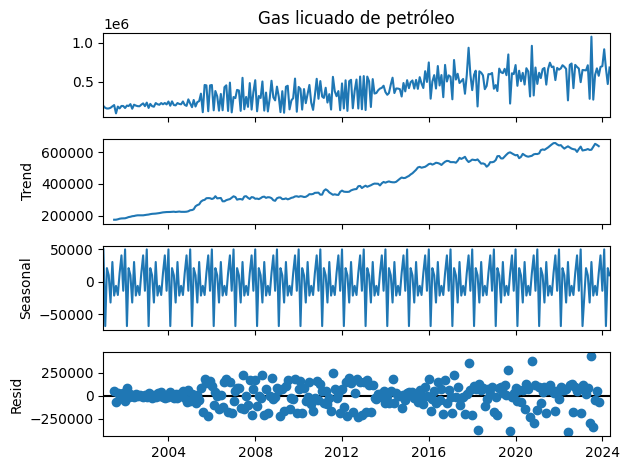

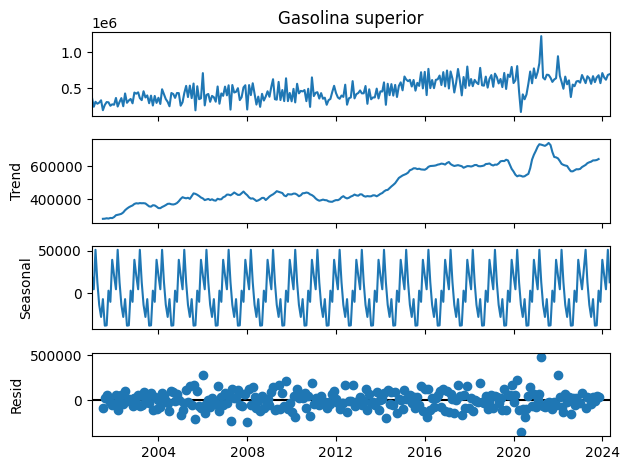

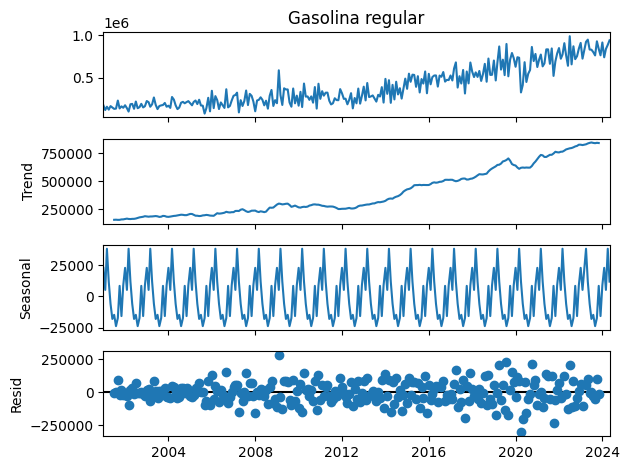

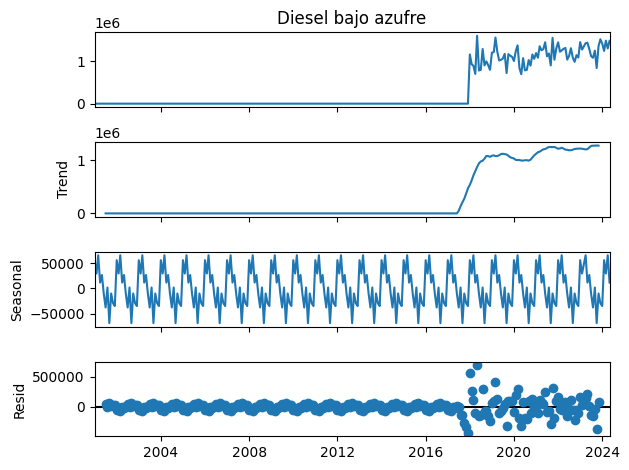

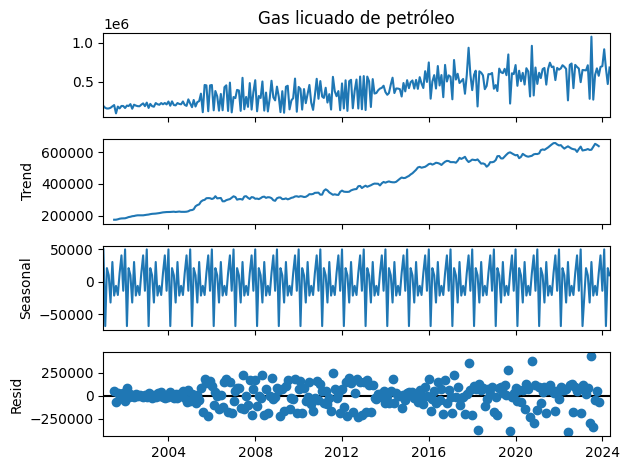

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición y estacionariedad
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        result = seasonal_decompose(serie[column].dropna(), model='additive', period=12)
        result.plot()
        plt.show()


#### 4 Determinar si es necesario transformar la serie y explicar:

Consumo de Gasolina superior - ADF Statistic: -2.9379872613362115
Consumo de Gasolina superior - p-value: 0.04110557714312691
¿Estacionaria? Sí
Consumo de Gasolina regular - ADF Statistic: 0.8329542772360767
Consumo de Gasolina regular - p-value: 0.9921499127119986
¿Estacionaria? No
La serie Consumo de Gasolina regular no es estacionaria en media. Se recomienda transformar la serie.


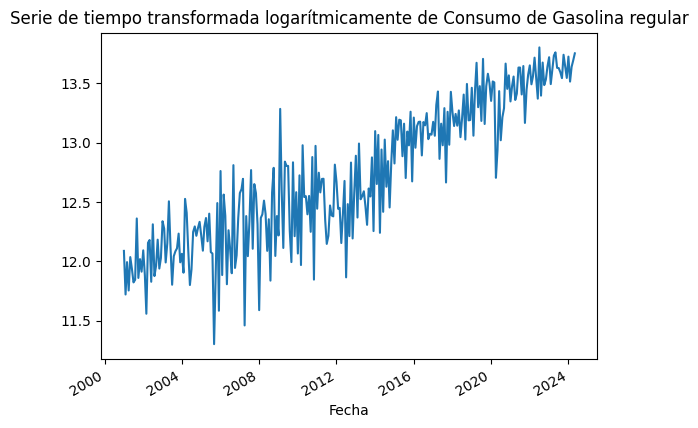

Consumo de Diesel bajo azufre - ADF Statistic: -0.3716941835330495
Consumo de Diesel bajo azufre - p-value: 0.9147186441895404
¿Estacionaria? No
La serie Consumo de Diesel bajo azufre no es estacionaria en media. Se recomienda transformar la serie.


/home/arg/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


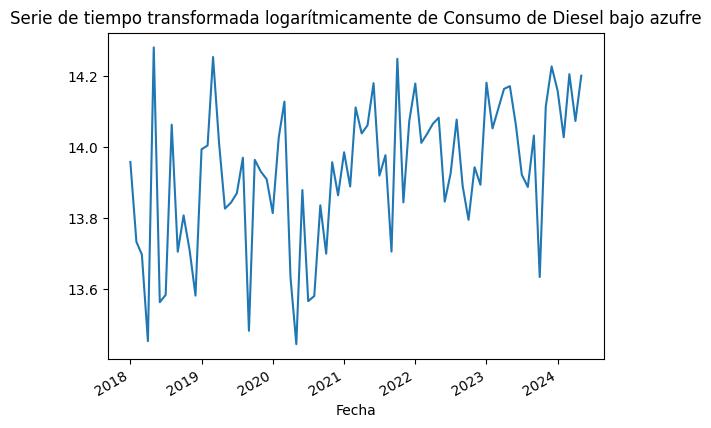

Consumo de Gas licuado de petróleo - ADF Statistic: -0.44811450075029063
Consumo de Gas licuado de petróleo - p-value: 0.9017501519888091
¿Estacionaria? No
La serie Consumo de Gas licuado de petróleo no es estacionaria en media. Se recomienda transformar la serie.


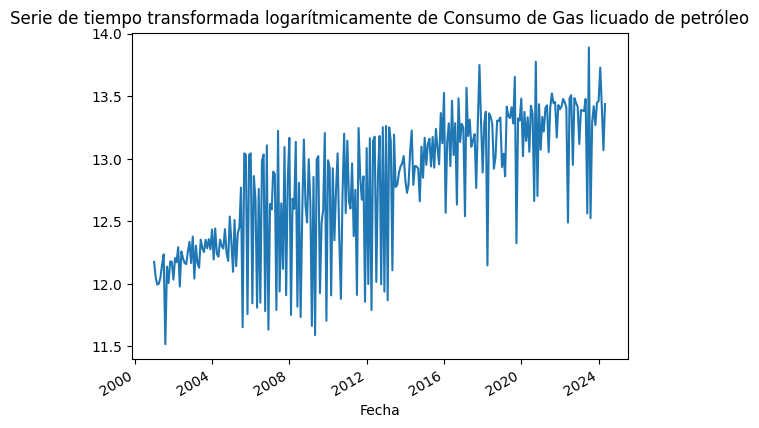

Importación de Gasolina superior - ADF Statistic: -2.9379872613362115
Importación de Gasolina superior - p-value: 0.04110557714312691
¿Estacionaria? Sí
Importación de Gasolina regular - ADF Statistic: 0.8329542772360767
Importación de Gasolina regular - p-value: 0.9921499127119986
¿Estacionaria? No
La serie Importación de Gasolina regular no es estacionaria en media. Se recomienda transformar la serie.


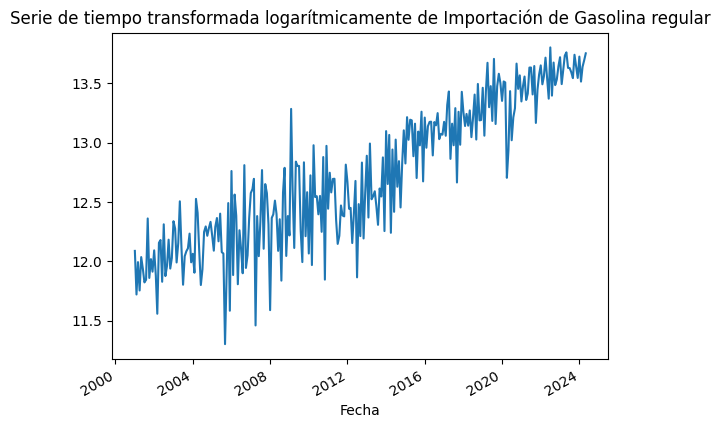

Importación de Diesel bajo azufre - ADF Statistic: -0.3716941835330495
Importación de Diesel bajo azufre - p-value: 0.9147186441895404
¿Estacionaria? No
La serie Importación de Diesel bajo azufre no es estacionaria en media. Se recomienda transformar la serie.


/home/arg/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


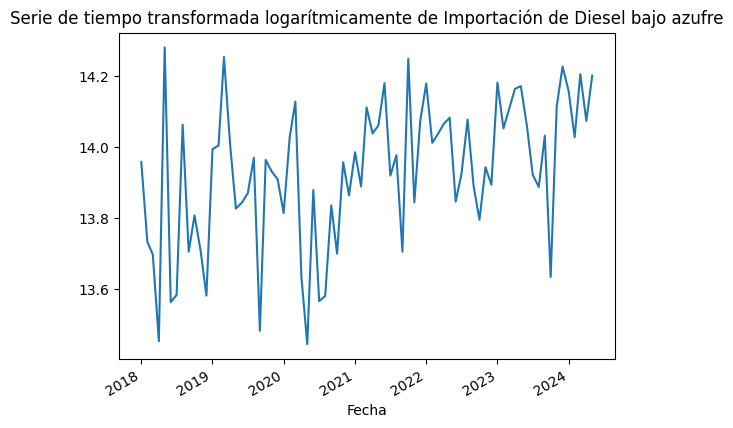

Importación de Gas licuado de petróleo - ADF Statistic: -0.44811450075029063
Importación de Gas licuado de petróleo - p-value: 0.9017501519888091
¿Estacionaria? No
La serie Importación de Gas licuado de petróleo no es estacionaria en media. Se recomienda transformar la serie.


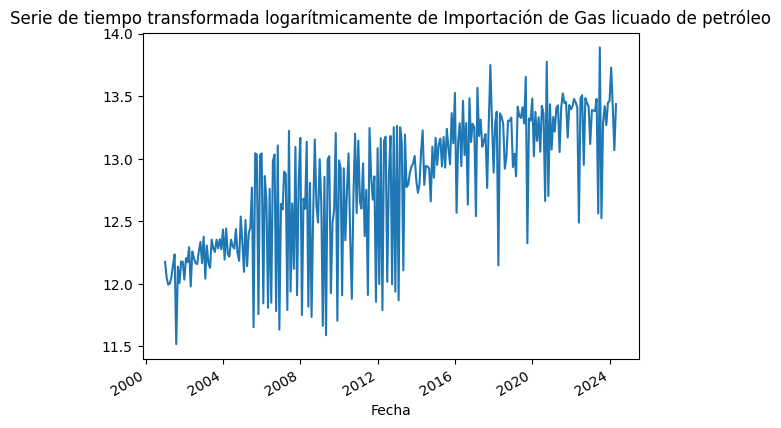

Precios de Gasolina superior - ADF Statistic: -2.9379872613362115
Precios de Gasolina superior - p-value: 0.04110557714312691
¿Estacionaria? Sí
Precios de Gasolina regular - ADF Statistic: 0.8329542772360767
Precios de Gasolina regular - p-value: 0.9921499127119986
¿Estacionaria? No
La serie Precios de Gasolina regular no es estacionaria en media. Se recomienda transformar la serie.


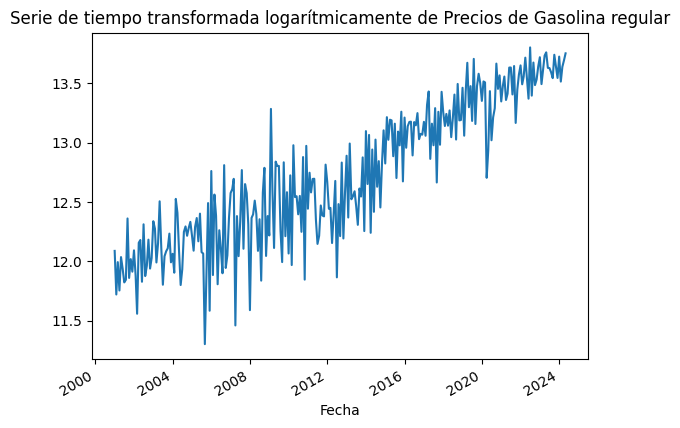

Precios de Diesel bajo azufre - ADF Statistic: -0.3716941835330495
Precios de Diesel bajo azufre - p-value: 0.9147186441895404
¿Estacionaria? No
La serie Precios de Diesel bajo azufre no es estacionaria en media. Se recomienda transformar la serie.


/home/arg/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


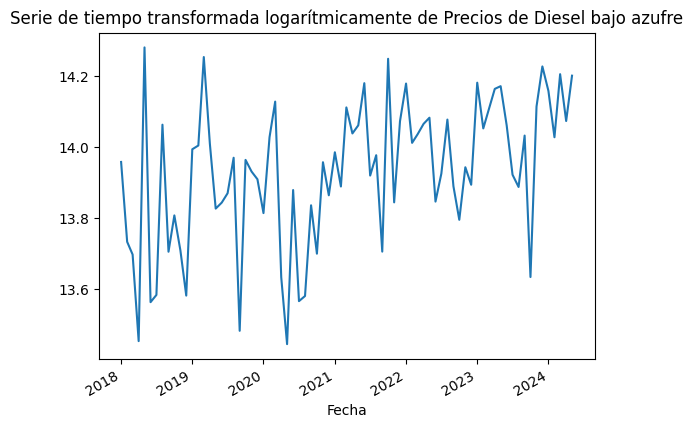

Precios de Gas licuado de petróleo - ADF Statistic: -0.44811450075029063
Precios de Gas licuado de petróleo - p-value: 0.9017501519888091
¿Estacionaria? No
La serie Precios de Gas licuado de petróleo no es estacionaria en media. Se recomienda transformar la serie.


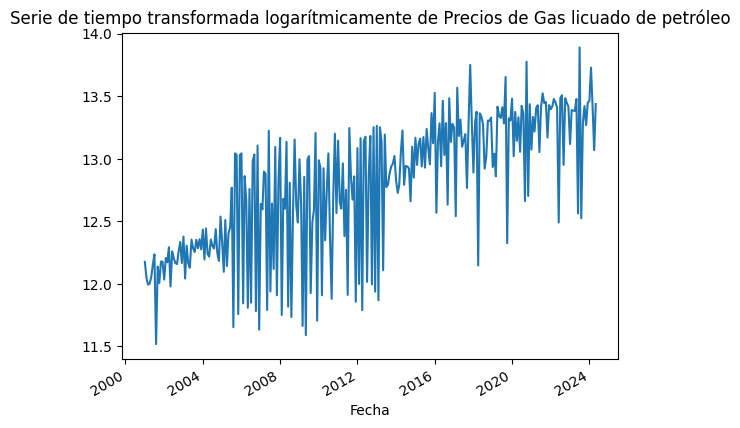

In [22]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller Aumentada y transformación si es necesario
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        adf_result = adfuller(serie[column].dropna())
        print(f'{nombre} de {column} - ADF Statistic: {adf_result[0]}')
        print(f'{nombre} de {column} - p-value: {adf_result[1]}')
        estacionaria = adf_result[1] < 0.05
        print(f'¿Estacionaria? {"Sí" if estacionaria else "No"}')
        
        if not estacionaria:
            print(f'La serie {nombre} de {column} no es estacionaria en media. Se recomienda transformar la serie.')
            serie_log = np.log(serie[column].dropna())
            plt.figure()
            serie_log.plot(title=f"Serie de tiempo transformada logarítmicamente de {nombre} de {column}")
            plt.show()


#### 5 Explicar la no estacionariedad en media:

#### Gráfico de autocorrelación y explicación de la no estacionariedad en media: Prueba de Dickey-Fuller Aumentada para corroborar la no estacionariedad en media y transformación si es necesario:

<Figure size 640x480 with 0 Axes>

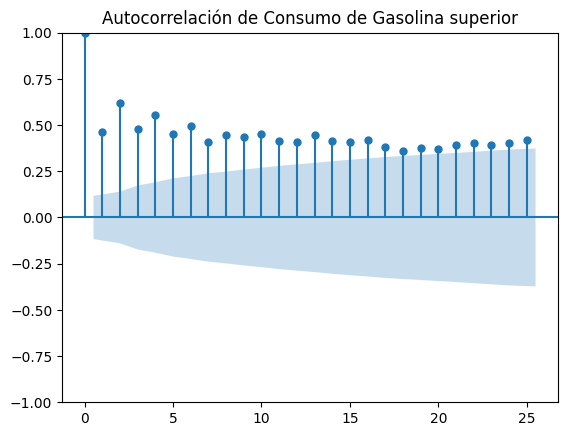

<Figure size 640x480 with 0 Axes>

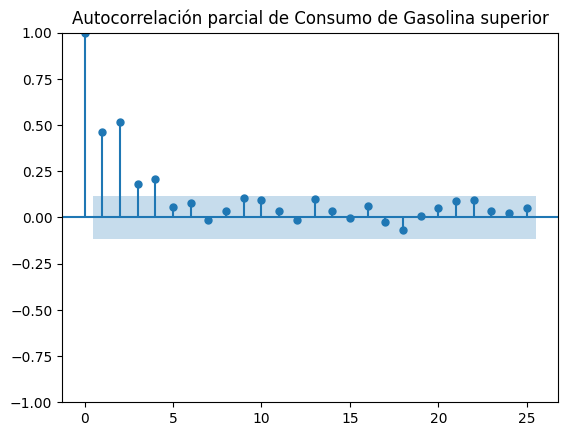

<Figure size 640x480 with 0 Axes>

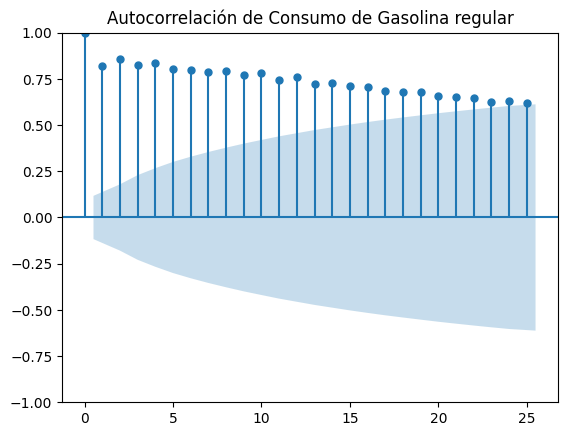

<Figure size 640x480 with 0 Axes>

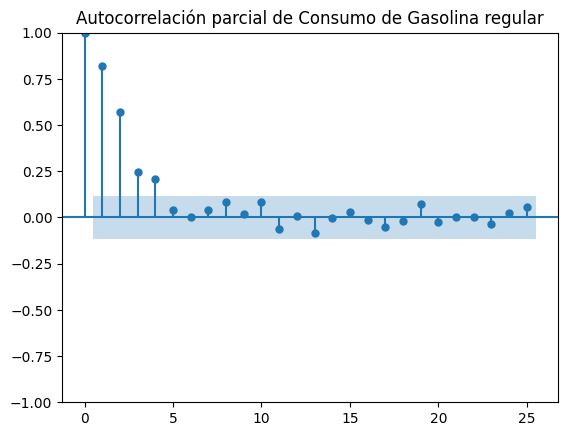

<Figure size 640x480 with 0 Axes>

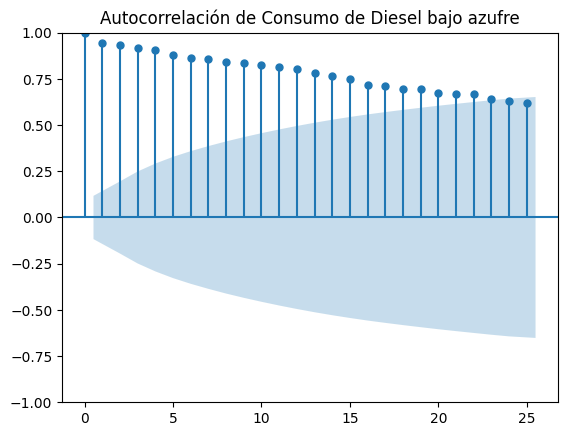

<Figure size 640x480 with 0 Axes>

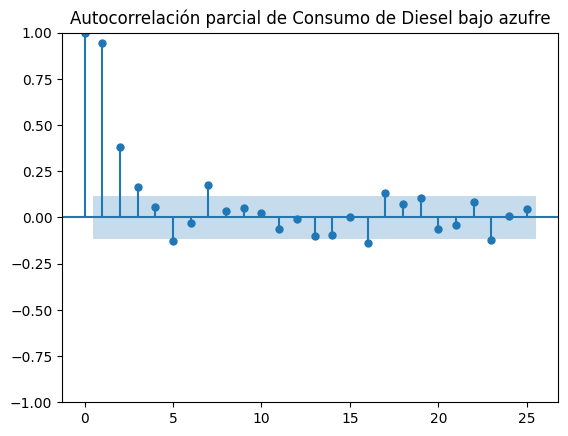

<Figure size 640x480 with 0 Axes>

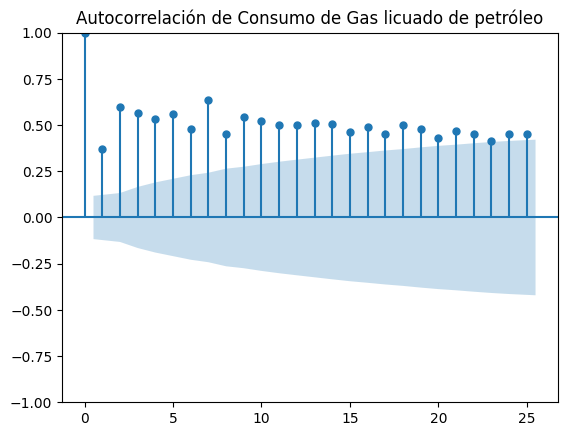

<Figure size 640x480 with 0 Axes>

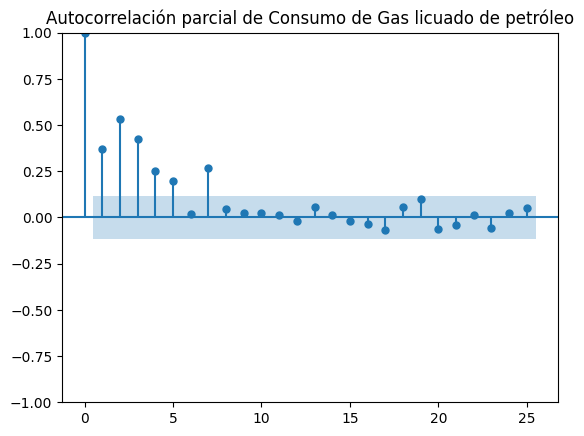

<Figure size 640x480 with 0 Axes>

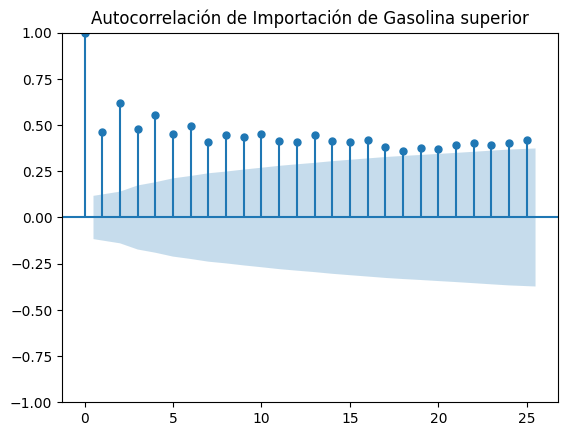

<Figure size 640x480 with 0 Axes>

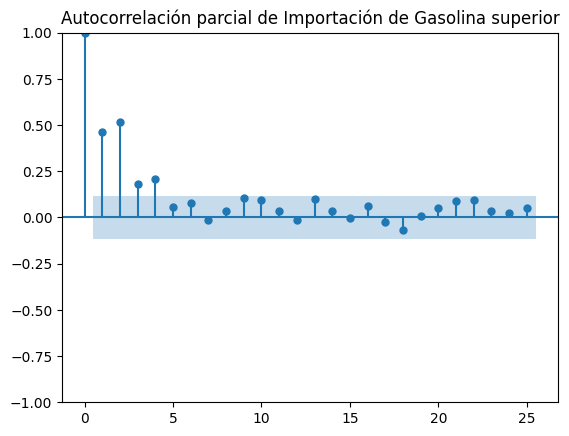

<Figure size 640x480 with 0 Axes>

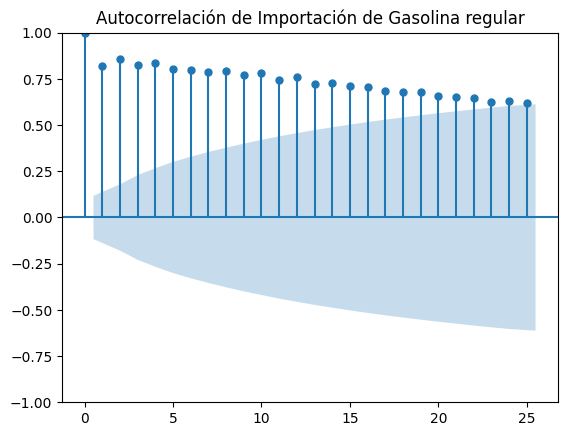

<Figure size 640x480 with 0 Axes>

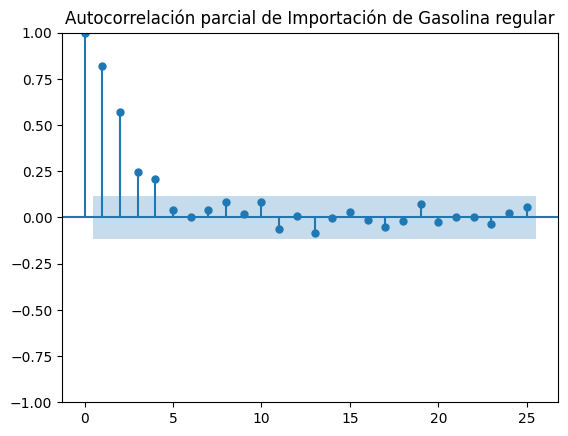

<Figure size 640x480 with 0 Axes>

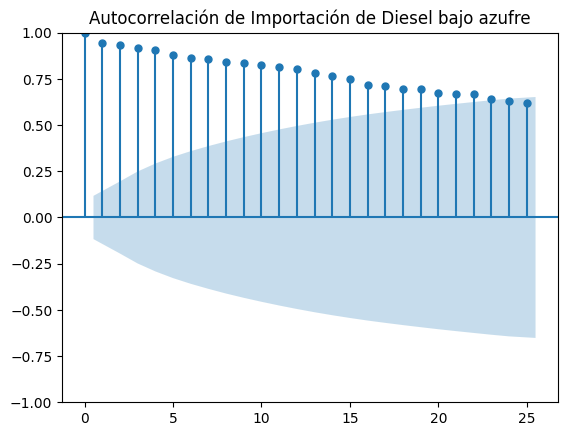

<Figure size 640x480 with 0 Axes>

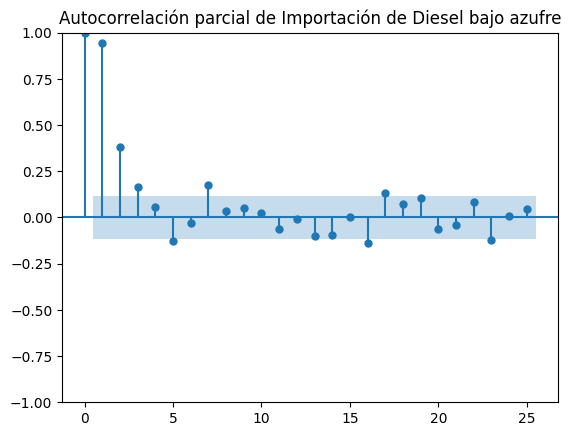

<Figure size 640x480 with 0 Axes>

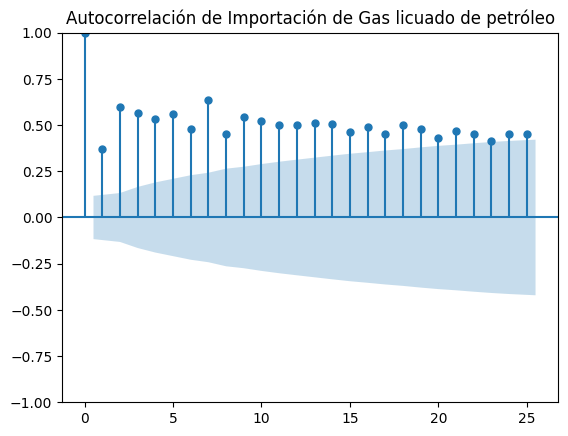

<Figure size 640x480 with 0 Axes>

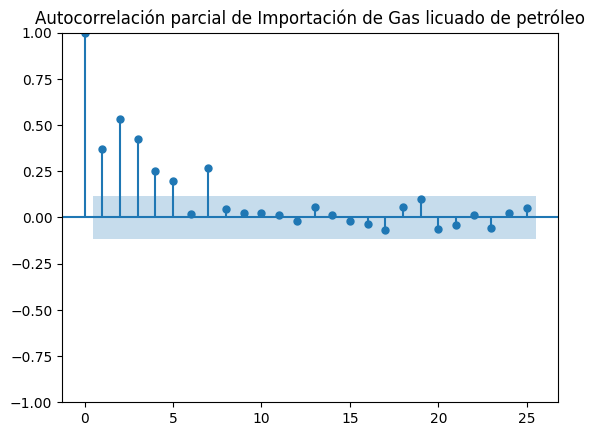

<Figure size 640x480 with 0 Axes>

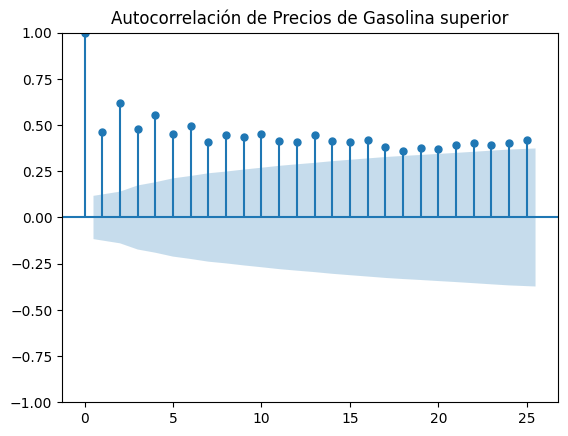

<Figure size 640x480 with 0 Axes>

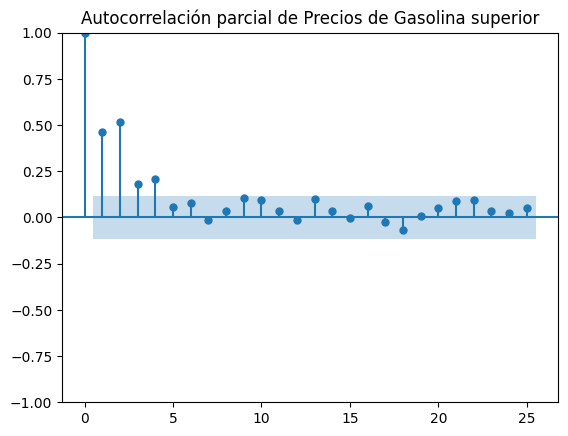

<Figure size 640x480 with 0 Axes>

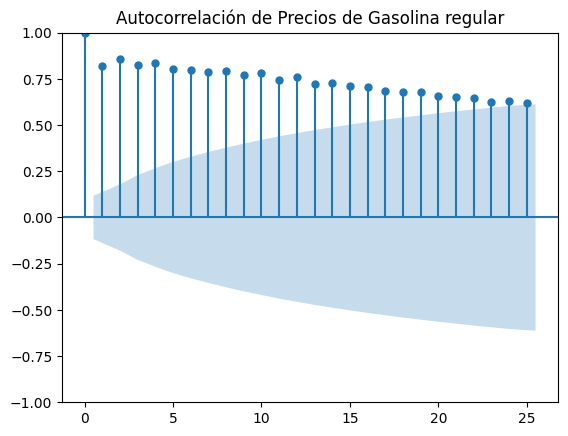

<Figure size 640x480 with 0 Axes>

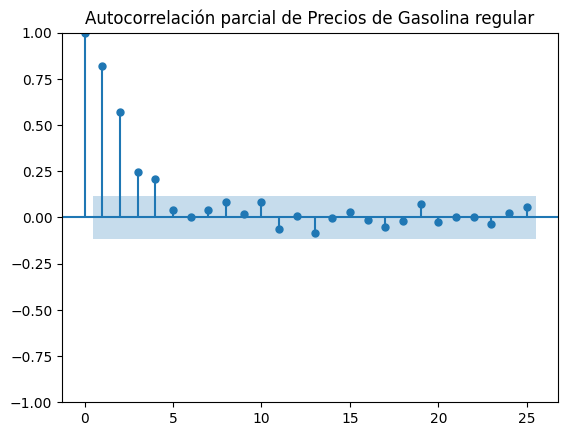

<Figure size 640x480 with 0 Axes>

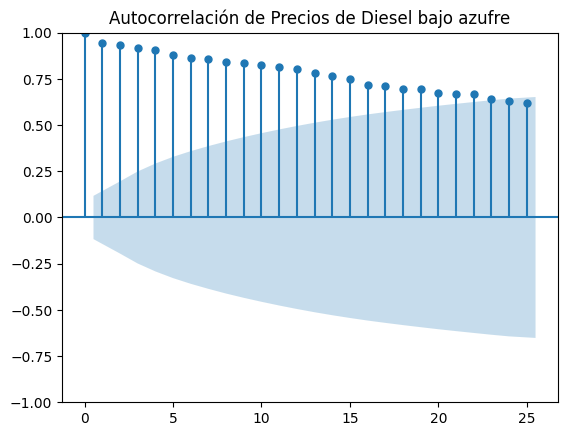

<Figure size 640x480 with 0 Axes>

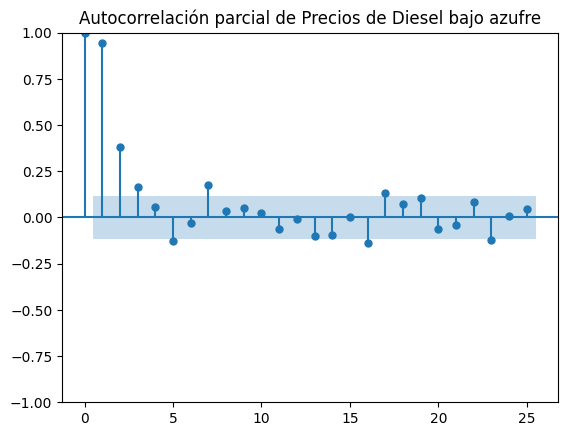

<Figure size 640x480 with 0 Axes>

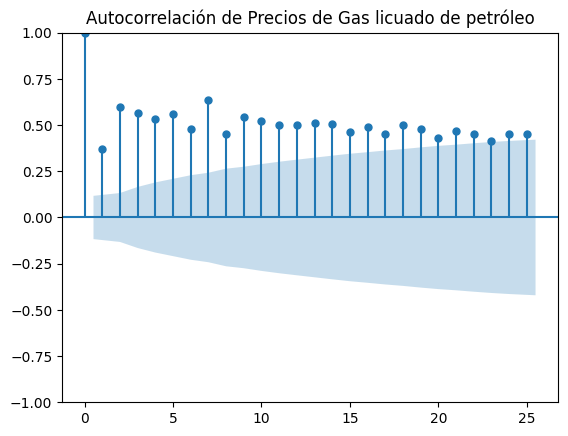

<Figure size 640x480 with 0 Axes>

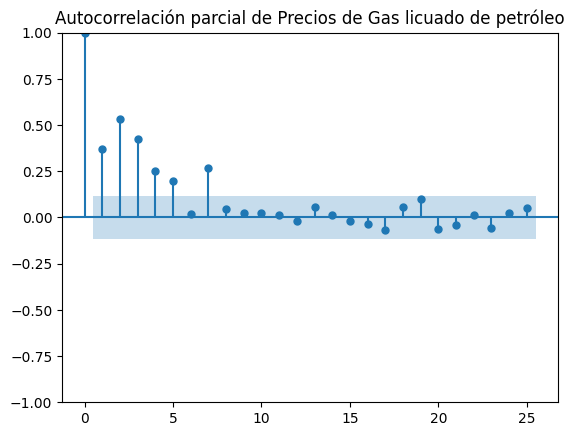

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráficos de autocorrelación y autocorrelación parcial
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        plt.figure()
        plot_acf(serie[column].dropna(), title=f"Autocorrelación de {nombre} de {column}")
        plt.show()

        plt.figure()
        plot_pacf(serie[column].dropna(), title=f"Autocorrelación parcial de {nombre} de {column}")
        plt.show()


In [26]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached Cython-3.0.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)


In [27]:
!pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 870.4 kB/s eta 0:00:00MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.1 MB/s eta 0:00:0031m38.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 13.0 MB/

#### 6. Elegir los parámetros p, q y d del modelo ARMA o ARIMA y explicación de la elección:

In [31]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Función para determinar d basado en la prueba de Dickey-Fuller Aumentada
def determinar_d(serie):
    resultado = adfuller(serie.dropna())
    p_value = resultado[1]
    d = 0 if p_value < 0.05 else 1  # Si la serie es estacionaria, d = 0; si no, d = 1
    return d

# Determinar d para cada serie
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        d = determinar_d(serie[column])
        print(f'Serie {nombre} de {column} - Diferenciaciones (d): {d}')



Serie Consumo de Gasolina superior - Diferenciaciones (d): 0
Serie Consumo de Gasolina regular - Diferenciaciones (d): 1
Serie Consumo de Diesel bajo azufre - Diferenciaciones (d): 1
Serie Consumo de Gas licuado de petróleo - Diferenciaciones (d): 1
Serie Importación de Gasolina superior - Diferenciaciones (d): 0
Serie Importación de Gasolina regular - Diferenciaciones (d): 1
Serie Importación de Diesel bajo azufre - Diferenciaciones (d): 1
Serie Importación de Gas licuado de petróleo - Diferenciaciones (d): 1
Serie Precios de Gasolina superior - Diferenciaciones (d): 0
Serie Precios de Gasolina regular - Diferenciaciones (d): 1
Serie Precios de Diesel bajo azufre - Diferenciaciones (d): 1
Serie Precios de Gas licuado de petróleo - Diferenciaciones (d): 1


<Figure size 640x480 with 0 Axes>

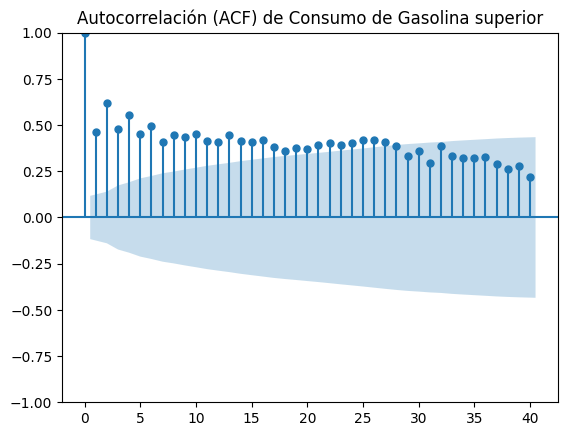

<Figure size 640x480 with 0 Axes>

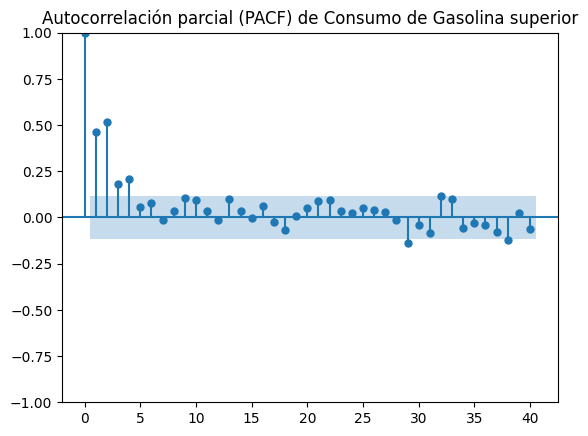

Ingrese el valor de p para Consumo de Gasolina superior:  0
Ingrese el valor de q para Consumo de Gasolina superior:  1


Seleccionados - p: 0, d: 0, q: 1 para Consumo de Gasolina superior


<Figure size 640x480 with 0 Axes>

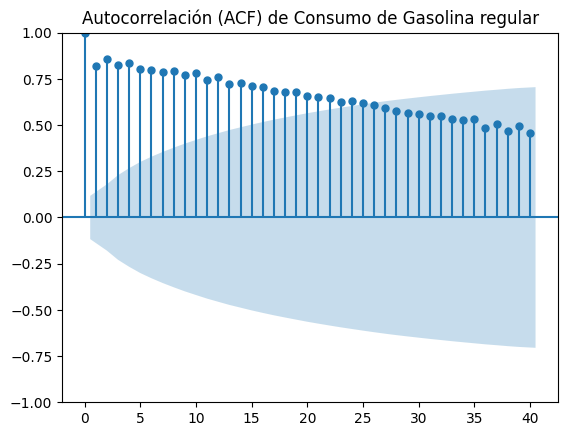

<Figure size 640x480 with 0 Axes>

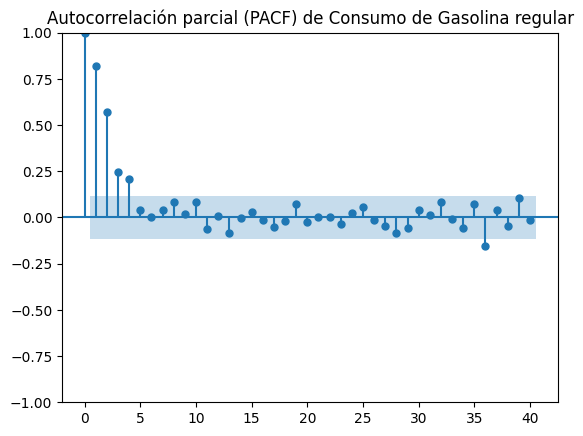

Ingrese el valor de p para Consumo de Gasolina regular:  1
Ingrese el valor de q para Consumo de Gasolina regular:  1


Seleccionados - p: 1, d: 1, q: 1 para Consumo de Gasolina regular


<Figure size 640x480 with 0 Axes>

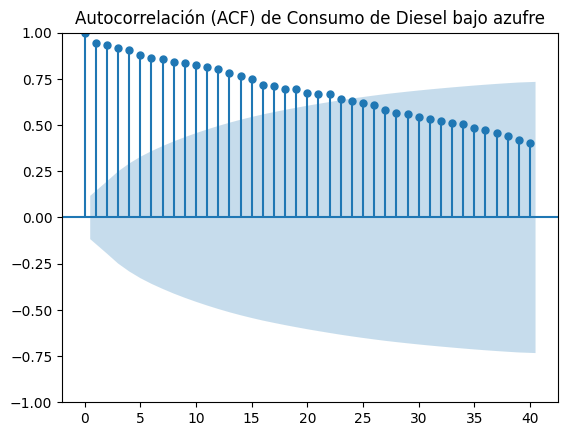

<Figure size 640x480 with 0 Axes>

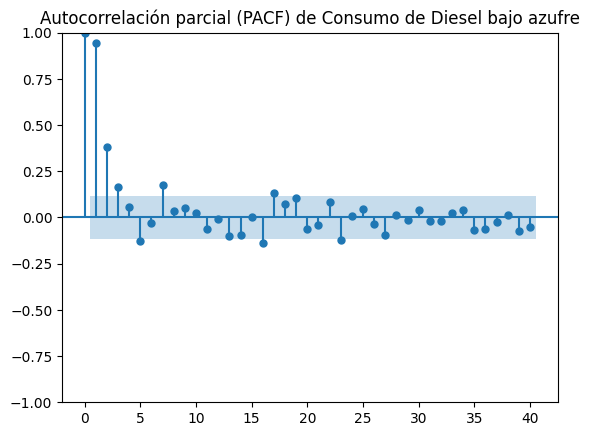

Ingrese el valor de p para Consumo de Diesel bajo azufre:  0
Ingrese el valor de q para Consumo de Diesel bajo azufre:  1


Seleccionados - p: 0, d: 1, q: 1 para Consumo de Diesel bajo azufre


<Figure size 640x480 with 0 Axes>

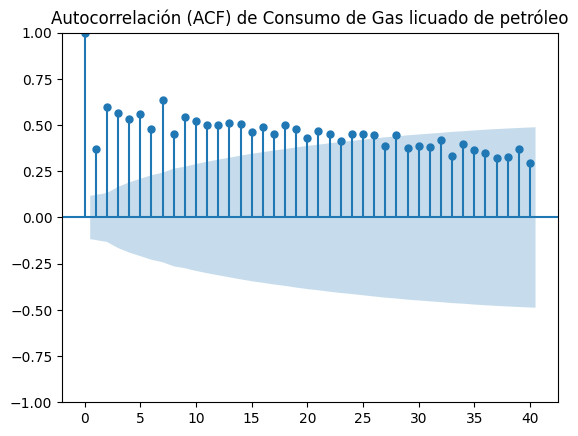

<Figure size 640x480 with 0 Axes>

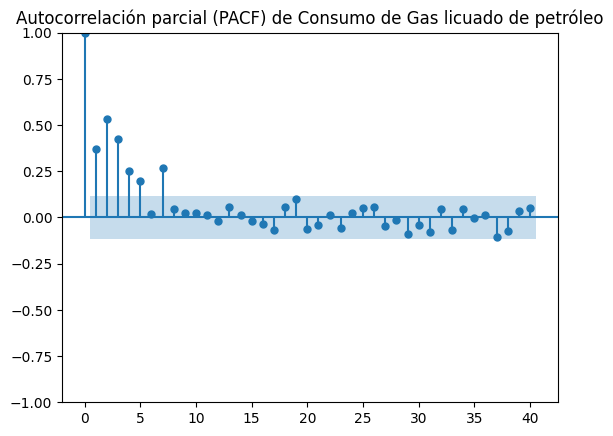

Ingrese el valor de p para Consumo de Gas licuado de petróleo:  1
Ingrese el valor de q para Consumo de Gas licuado de petróleo:  0


Seleccionados - p: 1, d: 1, q: 0 para Consumo de Gas licuado de petróleo


<Figure size 640x480 with 0 Axes>

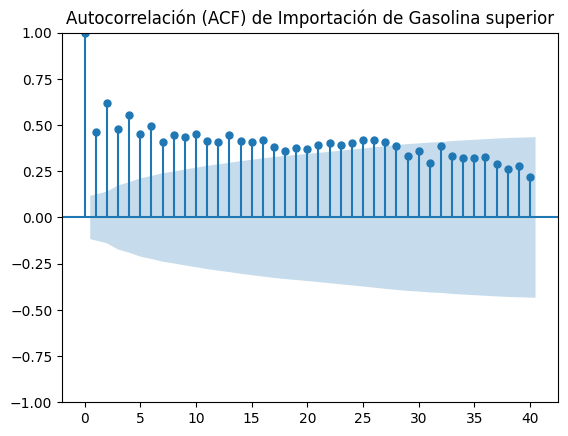

<Figure size 640x480 with 0 Axes>

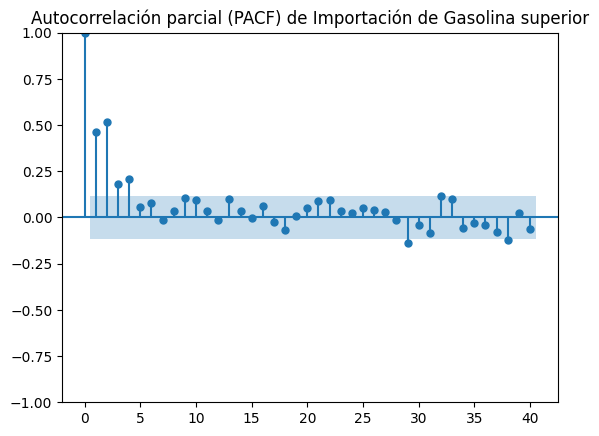

Ingrese el valor de p para Importación de Gasolina superior:  0
Ingrese el valor de q para Importación de Gasolina superior:  1


Seleccionados - p: 0, d: 0, q: 1 para Importación de Gasolina superior


<Figure size 640x480 with 0 Axes>

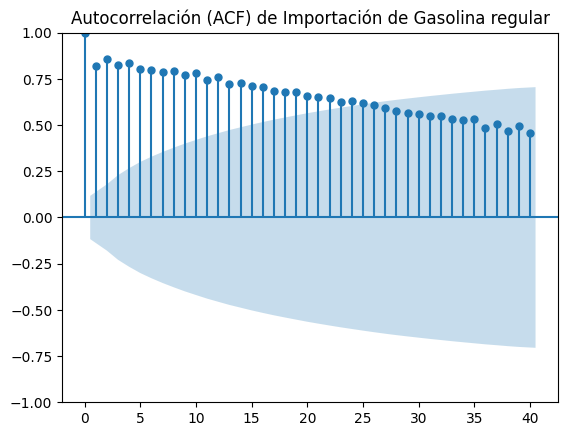

<Figure size 640x480 with 0 Axes>

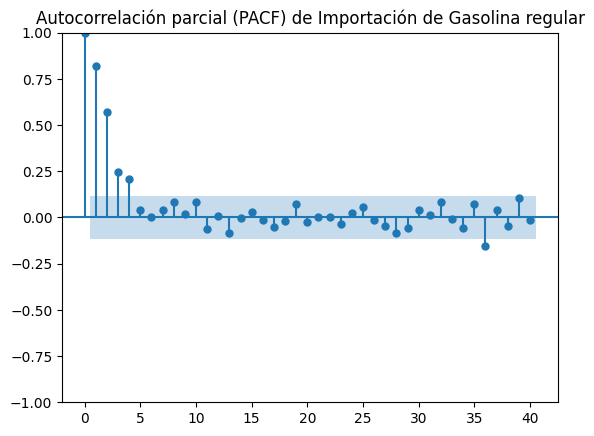

Ingrese el valor de p para Importación de Gasolina regular:  1
Ingrese el valor de q para Importación de Gasolina regular:  1


Seleccionados - p: 1, d: 1, q: 1 para Importación de Gasolina regular


<Figure size 640x480 with 0 Axes>

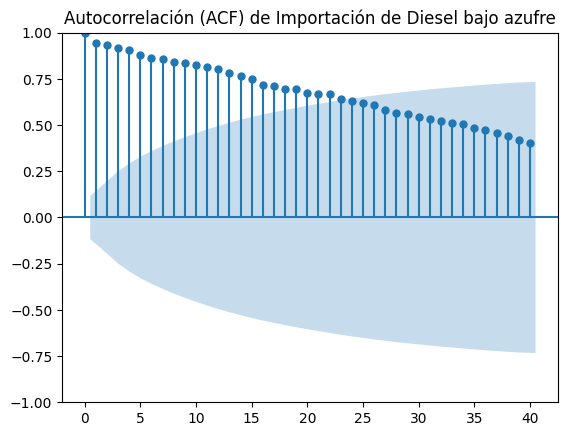

<Figure size 640x480 with 0 Axes>

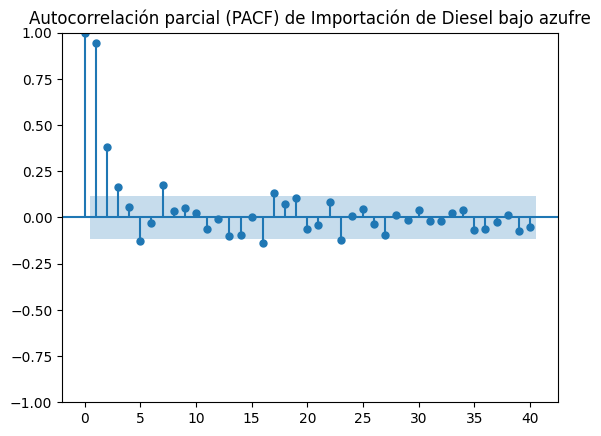

Ingrese el valor de p para Importación de Diesel bajo azufre:  0
Ingrese el valor de q para Importación de Diesel bajo azufre:  0


Seleccionados - p: 0, d: 1, q: 0 para Importación de Diesel bajo azufre


<Figure size 640x480 with 0 Axes>

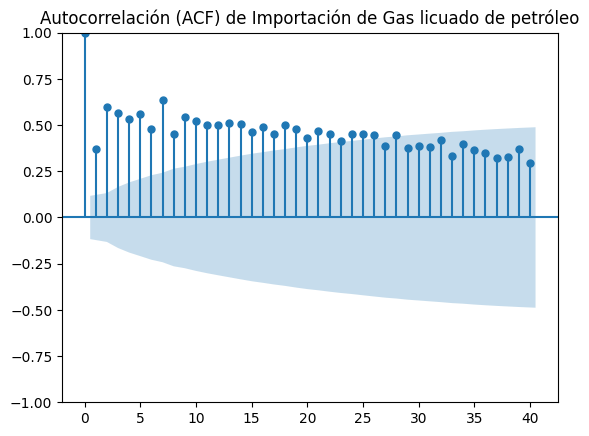

<Figure size 640x480 with 0 Axes>

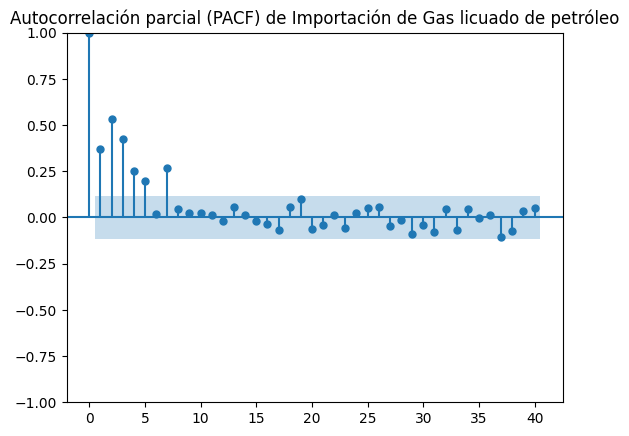

Ingrese el valor de p para Importación de Gas licuado de petróleo:  1
Ingrese el valor de q para Importación de Gas licuado de petróleo:  1


Seleccionados - p: 1, d: 1, q: 1 para Importación de Gas licuado de petróleo


<Figure size 640x480 with 0 Axes>

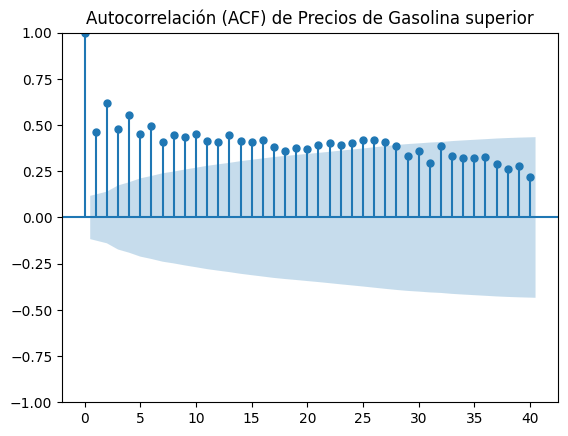

<Figure size 640x480 with 0 Axes>

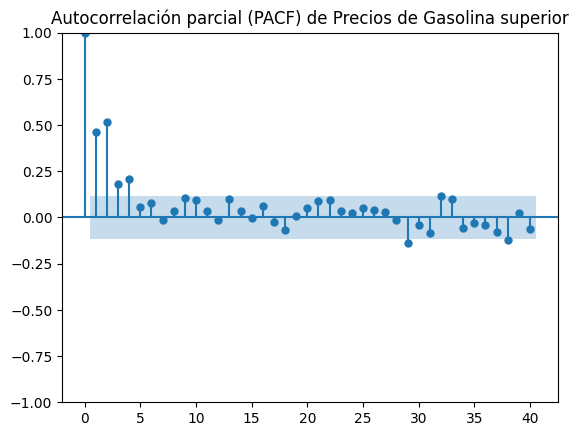

Ingrese el valor de p para Precios de Gasolina superior:  0
Ingrese el valor de q para Precios de Gasolina superior:  0


Seleccionados - p: 0, d: 0, q: 0 para Precios de Gasolina superior


<Figure size 640x480 with 0 Axes>

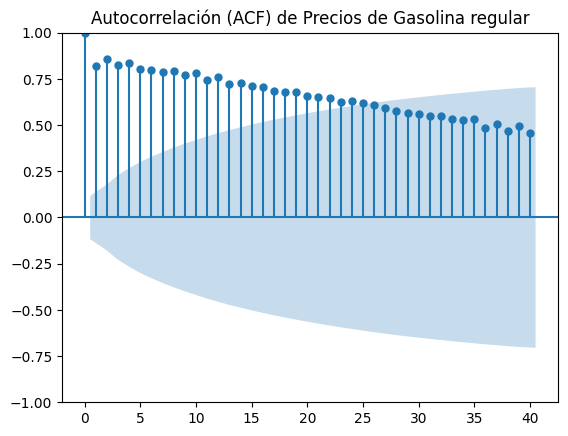

<Figure size 640x480 with 0 Axes>

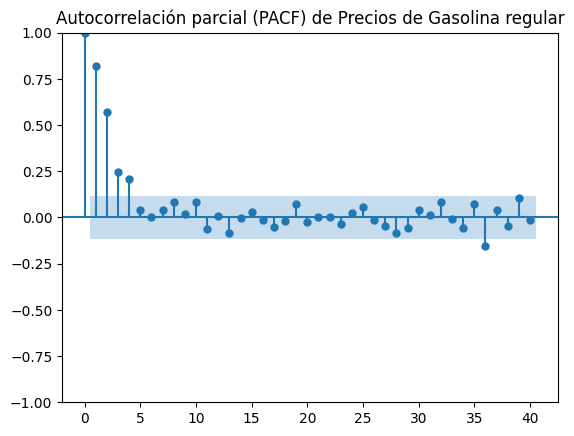

Ingrese el valor de p para Precios de Gasolina regular:  1
Ingrese el valor de q para Precios de Gasolina regular:  1


Seleccionados - p: 1, d: 1, q: 1 para Precios de Gasolina regular


<Figure size 640x480 with 0 Axes>

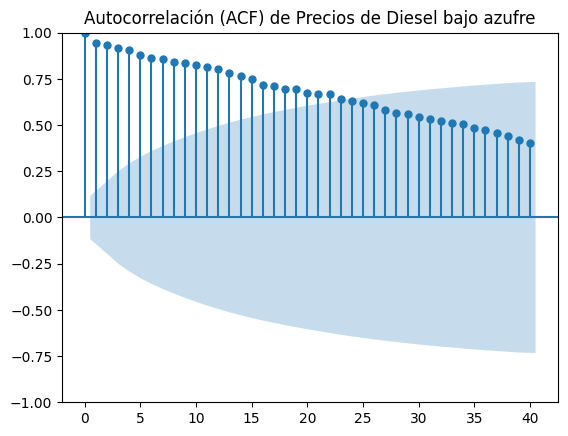

<Figure size 640x480 with 0 Axes>

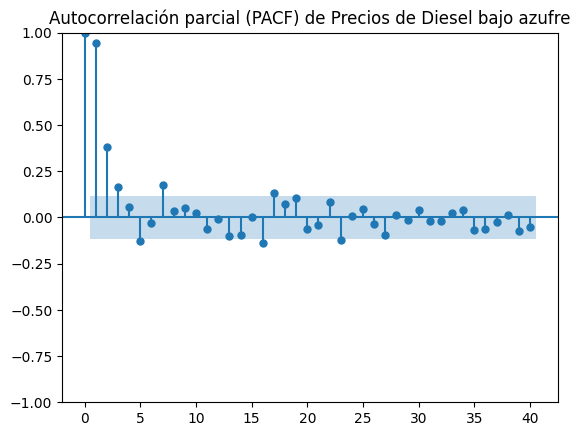

Ingrese el valor de p para Precios de Diesel bajo azufre:  0
Ingrese el valor de q para Precios de Diesel bajo azufre:  0


Seleccionados - p: 0, d: 1, q: 0 para Precios de Diesel bajo azufre


<Figure size 640x480 with 0 Axes>

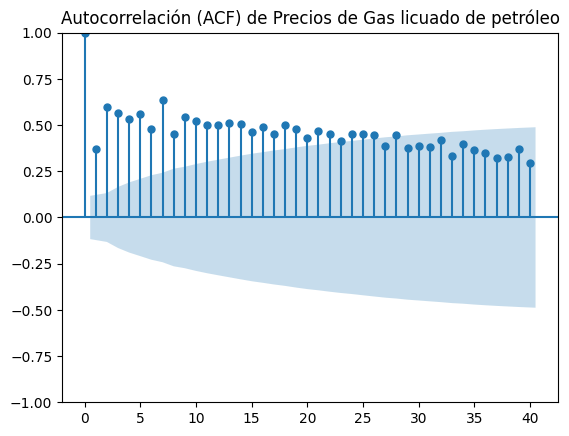

<Figure size 640x480 with 0 Axes>

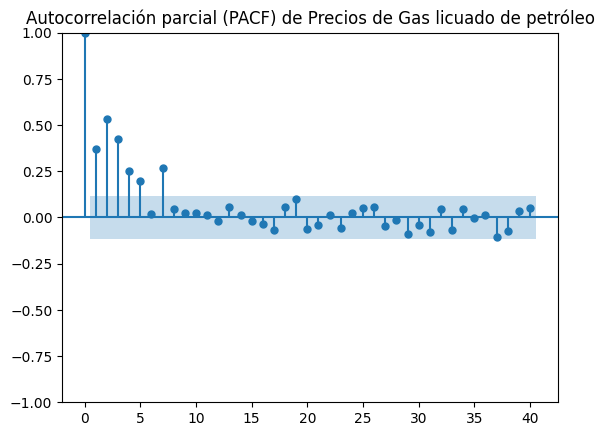

Ingrese el valor de p para Precios de Gas licuado de petróleo:  1
Ingrese el valor de q para Precios de Gas licuado de petróleo:  0


Seleccionados - p: 1, d: 1, q: 0 para Precios de Gas licuado de petróleo


In [32]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para mostrar gráficos ACF y PACF y determinar p y q manualmente
def seleccionar_p_q(serie, nombre):
    plt.figure()
    plot_acf(serie.dropna(), lags=40)
    plt.title(f'Autocorrelación (ACF) de {nombre}')
    plt.show()
    
    plt.figure()
    plot_pacf(serie.dropna(), lags=40)
    plt.title(f'Autocorrelación parcial (PACF) de {nombre}')
    plt.show()
    
    # Solicitar al usuario ingresar los valores de p y q basados en los gráficos
    p = int(input(f'Ingrese el valor de p para {nombre}: '))
    q = int(input(f'Ingrese el valor de q para {nombre}: '))
    
    return p, q

# Seleccionar p y q para cada serie
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        p, q = seleccionar_p_q(serie[column], f'{nombre} de {column}')
        d = determinar_d(serie[column])
        print(f'Seleccionados - p: {p}, d: {d}, q: {q} para {nombre} de {column}')


#### 7. Crear varios modelos ARIMA y analizar los residuos y las métricas AIC y BIC, eligiendo el mejor modelo:

/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

Best ARIMA model for Consumo de Gasolina superior - order: (2, 1, 1), AIC: 7272.55385501696


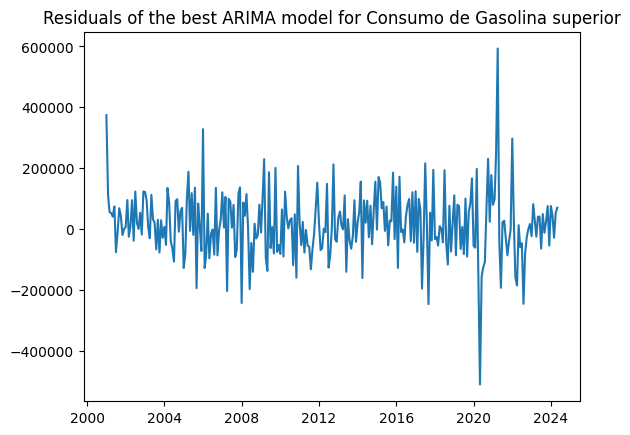

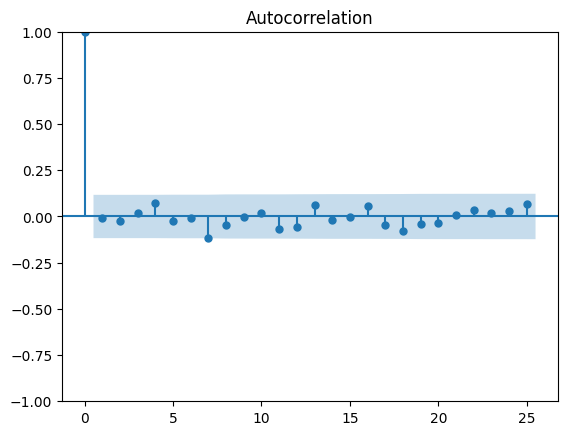

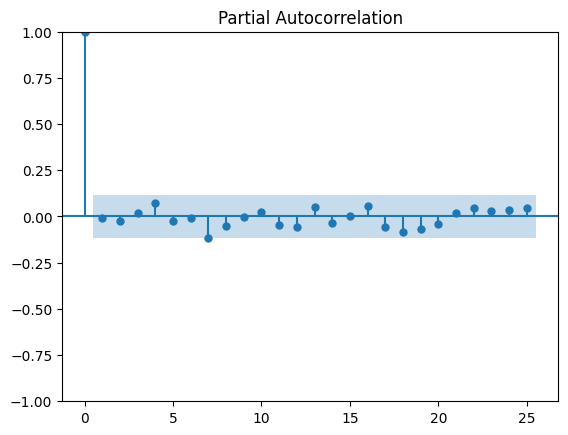

Consumo de Gasolina superior - AIC: 7272.55385501696, BIC: 7287.078702144246


/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/arg/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Función para crear y evaluar varios modelos ARIMA
def evaluar_modelos_arima(serie, nombre, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_mdl = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    tmp_mdl = ARIMA(serie.dropna(), order=(p, d, q)).fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (p, d, q)
                        best_mdl = tmp_mdl
                except:
                    continue
    
    print(f'Best ARIMA model for {nombre} - order: {best_order}, AIC: {best_aic}')
    return best_mdl

# Definir rangos para p, d y q
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

# Evaluar modelos ARIMA para cada serie
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        best_mdl = evaluar_modelos_arima(serie[column], f'{nombre} de {column}', p_values, d_values, q_values)
        
        # Graficar los residuos del mejor modelo
        residuals = best_mdl.resid
        plt.figure()
        plt.plot(residuals)
        plt.title(f'Residuals of the best ARIMA model for {nombre} de {column}')
        plt.show()

        # Graficar la función de autocorrelación de los residuos
        plot_acf(residuals)
        plt.show()

        plot_pacf(residuals)
        plt.show()

        # Imprimir las métricas AIC y BIC
        print(f'{nombre} de {column} - AIC: {best_mdl.aic}, BIC: {best_mdl.bic}')


#### 8 Crear un modelo usando el algoritmo Prophet de Facebook o redes neuronales y compararlo con los modelos anteriores para determinar cuál funciona mejor.

Error cuadrático medio para Gasolina superior (Consumo): 13818032800.524137


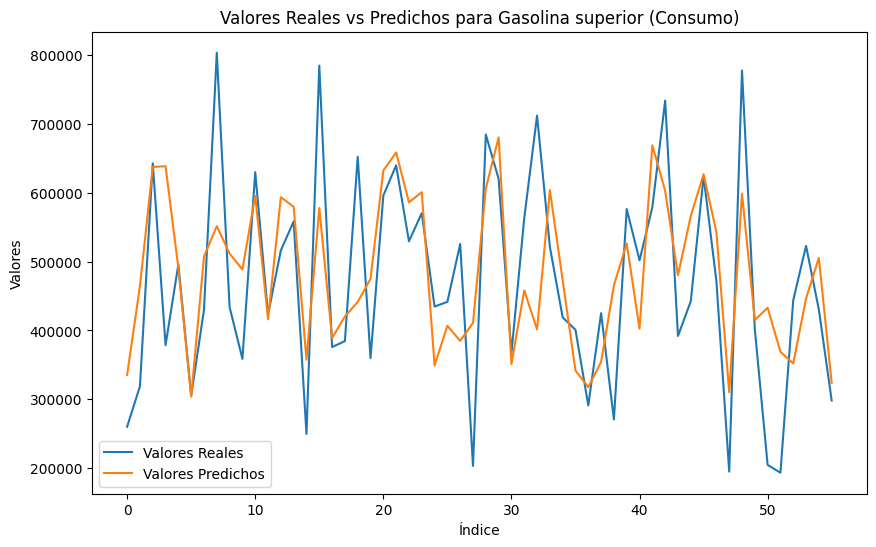

Error cuadrático medio para Gasolina regular (Consumo): 13225417881.164988


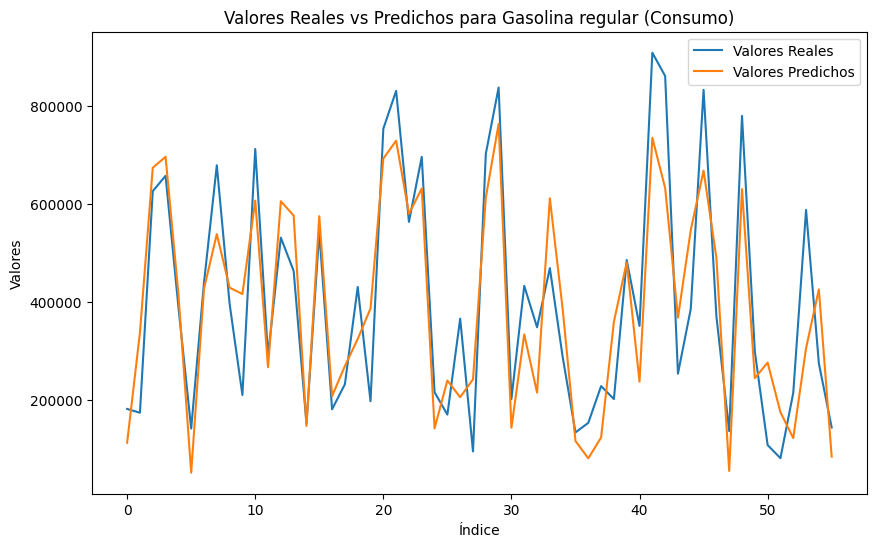

Error cuadrático medio para Diesel bajo azufre (Consumo): 96063906604.8423


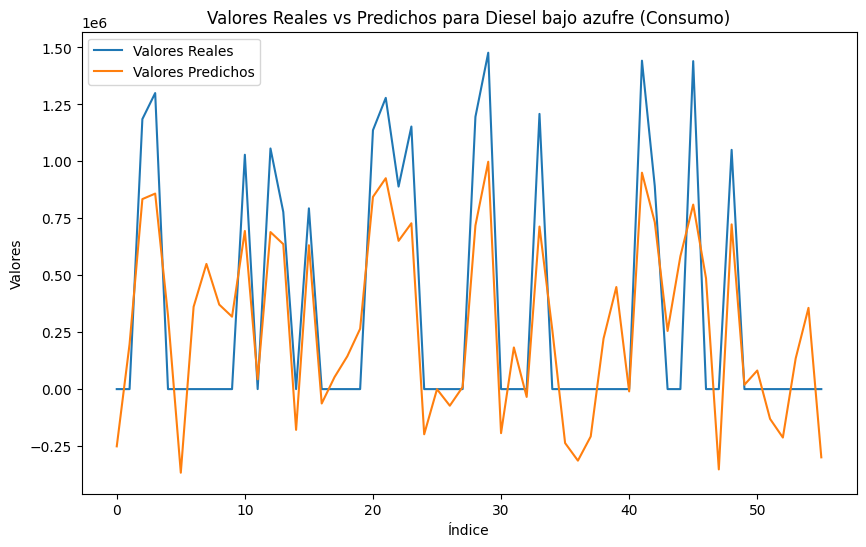

Error cuadrático medio para Gas licuado de petróleo (Consumo): 18443104285.853783


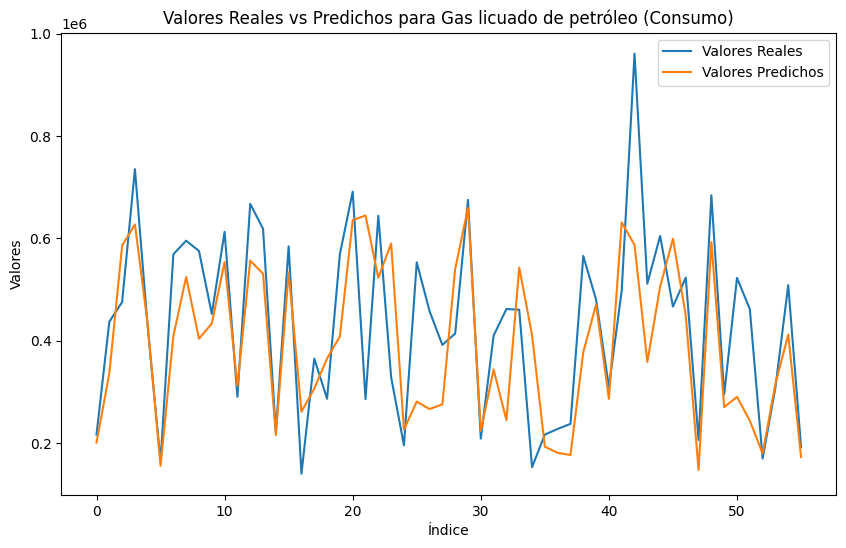

Error cuadrático medio para Gasolina superior (Importación): 13818032800.524137


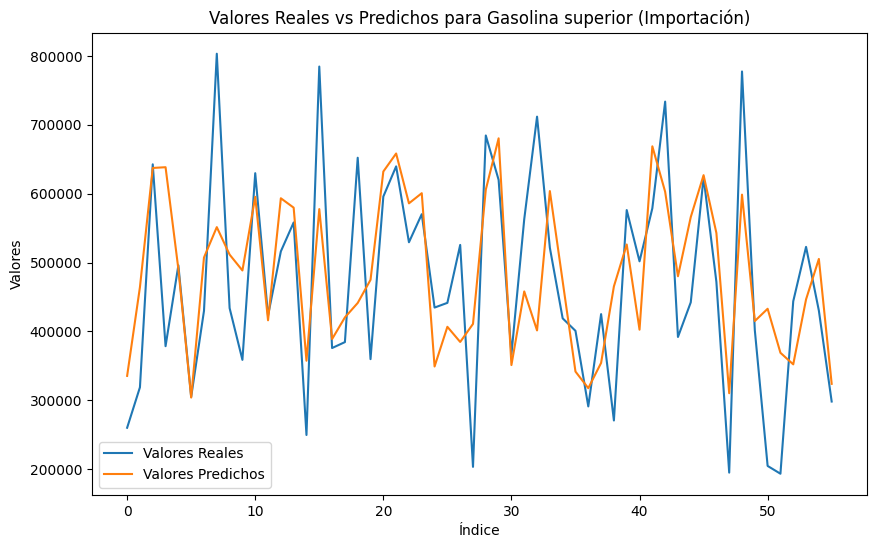

Error cuadrático medio para Gasolina regular (Importación): 13225417881.164988


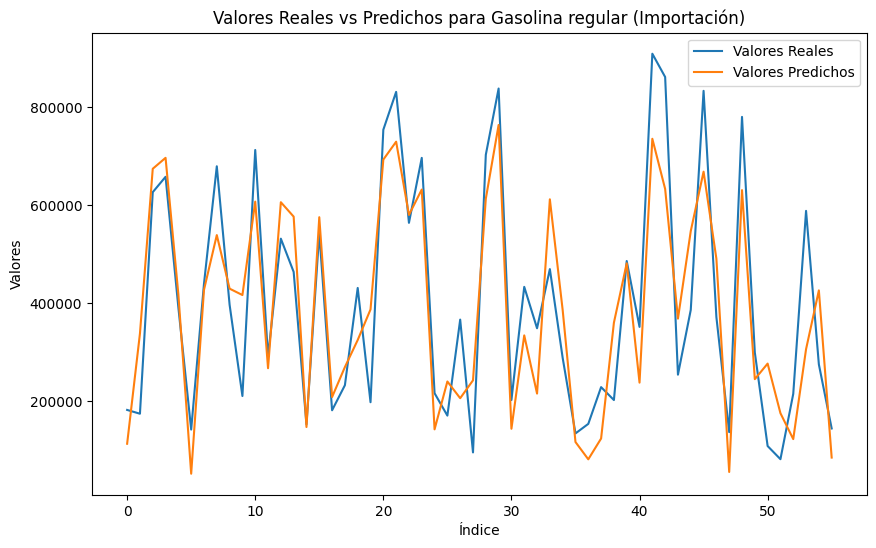

Error cuadrático medio para Diesel bajo azufre (Importación): 96063906604.8423


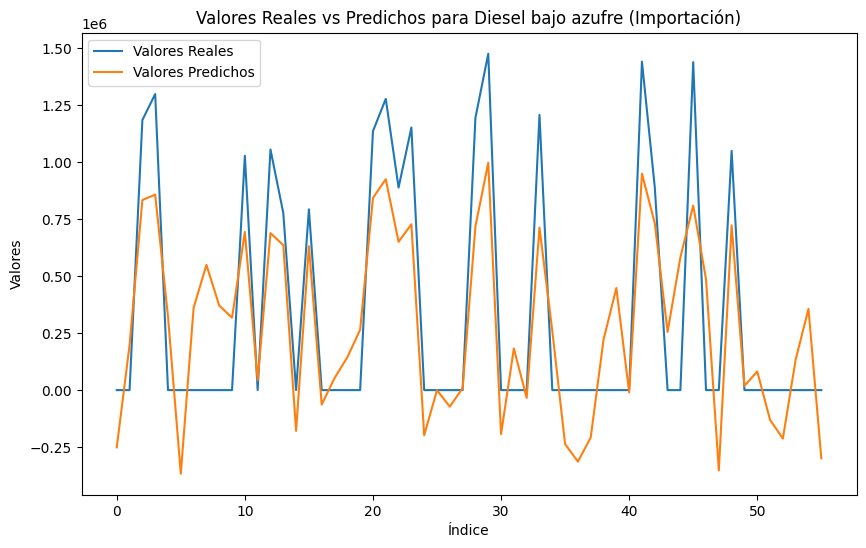

Error cuadrático medio para Gas licuado de petróleo (Importación): 18443104285.853783


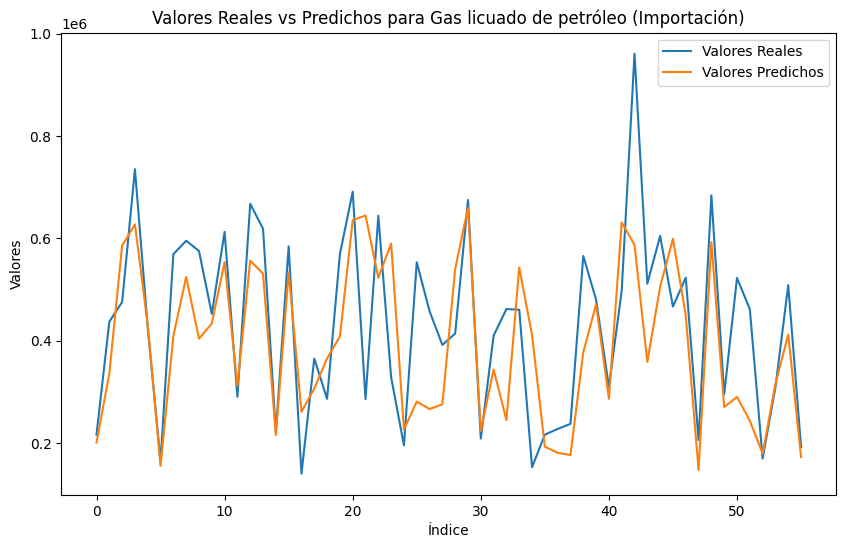

Error cuadrático medio para Gasolina superior (Precios): 13818032800.524137


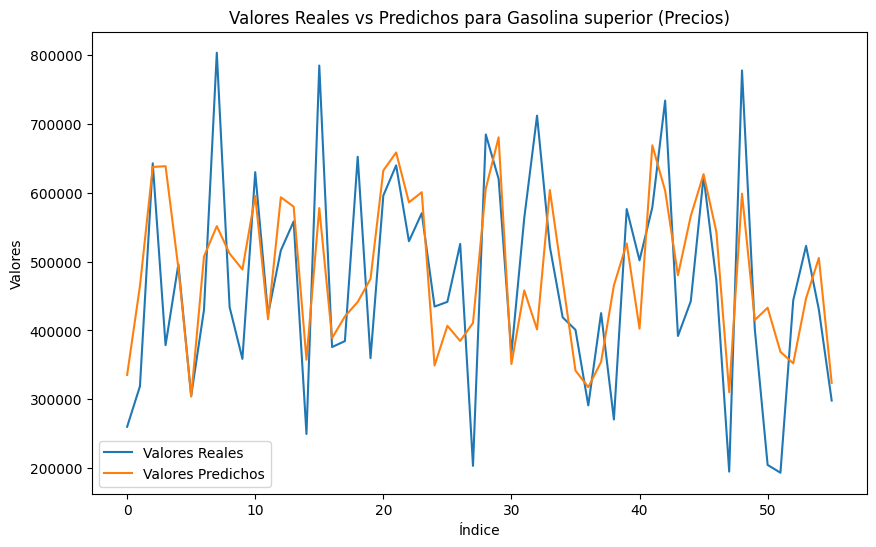

Error cuadrático medio para Gasolina regular (Precios): 13225417881.164988


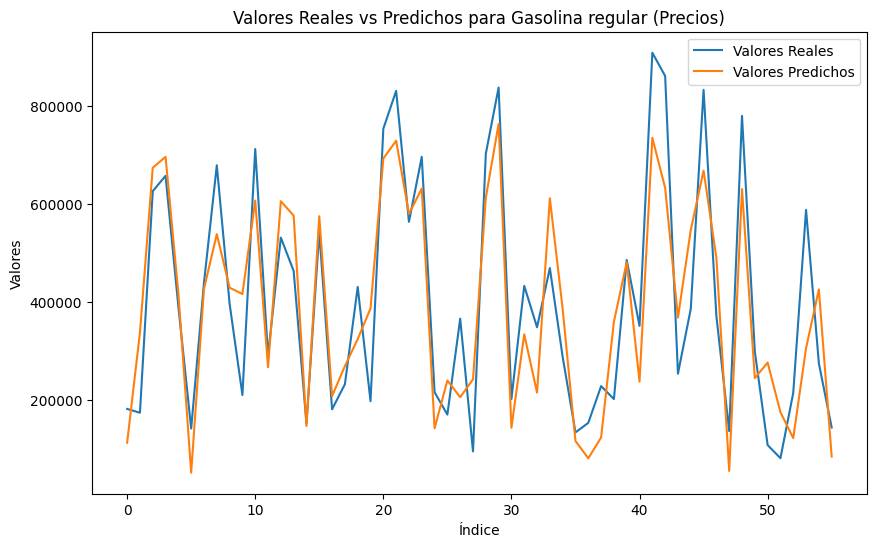

Error cuadrático medio para Diesel bajo azufre (Precios): 96063906604.8423


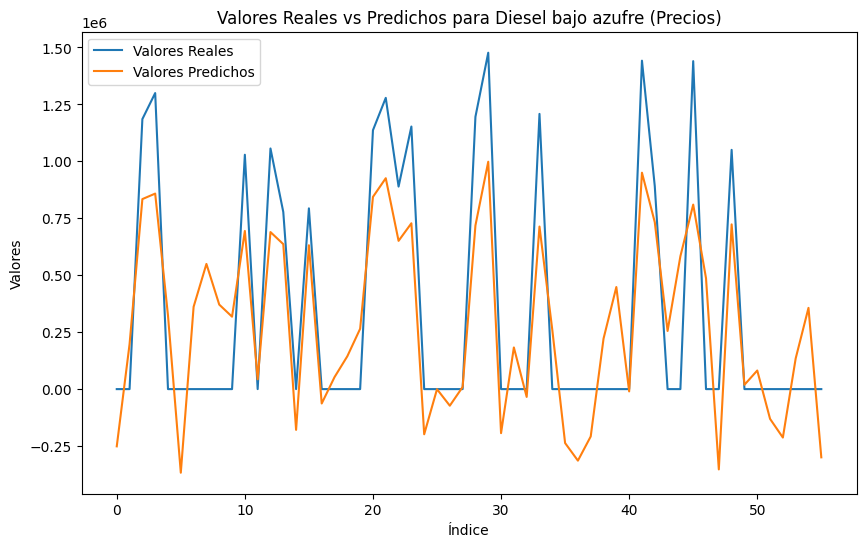

Error cuadrático medio para Gas licuado de petróleo (Precios): 18443104285.853783


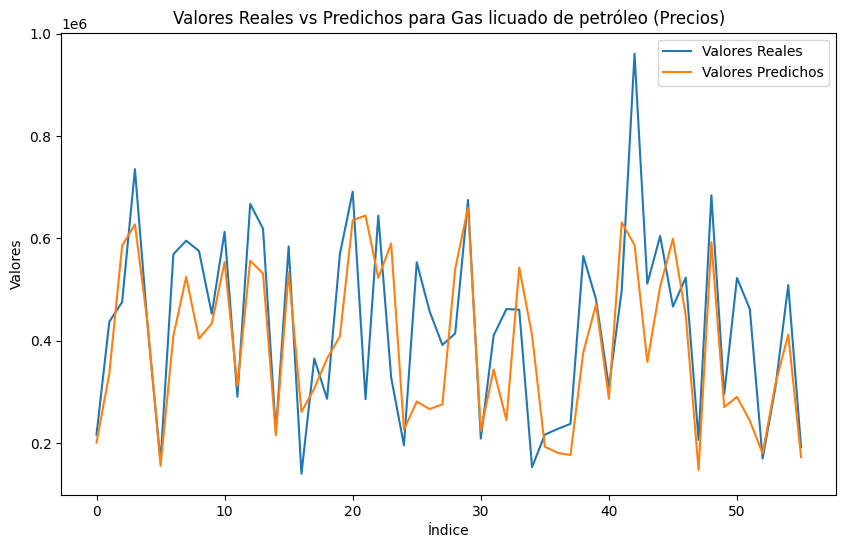

In [25]:
# Modelos de regresión lineal como alternativa (en lugar de Prophet o redes neuronales)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modelos de regresión lineal como alternativa
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        # Preparar datos
        df = serie[[column]].dropna().reset_index()
        df['mes'] = df['Fecha'].dt.month
        df['año'] = df['Fecha'].dt.year
        X = df[['año', 'mes']]
        y = df[column]

        # Dividir datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Crear y entrenar el modelo
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predicciones
        y_pred = model.predict(X_test)

        # Evaluar el modelo
        mse = mean_squared_error(y_test, y_pred)
        print(f'Error cuadrático medio para {column} ({nombre}): {mse}')

        # Visualizar resultados
        plt.figure(figsize=(10, 6))
        plt.plot(y_test.values, label='Valores Reales')
        plt.plot(y_pred, label='Valores Predichos')
        plt.legend()
        plt.title(f'Valores Reales vs Predichos para {column} ({nombre})')
        plt.xlabel('Índice')
        plt.ylabel('Valores')
        plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Asumiendo que tienes una columna de precios en el DataFrame
# Filtra los datos de precios
df_precios = data[['Fecha', 'año', 'mes'] + ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre']]

# Transforma los datos a formato largo
df_precios_long = pd.melt(df_precios, id_vars=['Fecha', 'año', 'mes'], 
                          value_vars=['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre'], 
                          var_name='tipo_combustible', 
                          value_name='precio')

# Prepara los datos para la regresión
X = df_precios_long[['año', 'mes']]
y = df_precios_long['precio']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predice los precios
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Precios Reales')
plt.plot(y_pred, label='Precios Predichos')
plt.legend()
plt.title('Precios Reales vs Predichos')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.show()


KeyError: "['Fecha', 'año', 'mes'] not in index"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar y preparar datos
data = pd.read_csv("depurado.csv")
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

# Selección de series
series_consumo = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_importacion = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_precios = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]

# Especificar inicio, fin y frecuencia
for serie in [series_consumo, series_importacion, series_precios]:
    inicio = serie.index.min()
    fin = serie.index.max()
    frecuencia = pd.infer_freq(serie.index)
    print(f'Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}')

# Gráficos de las series
for column in series_consumo.columns:
    series_consumo[column].plot(title=f"Serie de tiempo de {column}")
    plt.show()

# Descomposición y estacionariedad
for column in series_consumo.columns:
    result = seasonal_decompose(series_consumo[column].dropna(), model='additive', period=12)
    result.plot()
    plt.show()

    # Prueba de Dickey-Fuller Aumentada
    adf_result = adfuller(series_consumo[column].dropna())
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')

    # Graficar autocorrelación y autocorrelación parcial
    plot_acf(series_consumo[column].dropna())
    plt.show()

    plot_pacf(series_consumo[column].dropna())
    plt.show()

# Modelos de regresión lineal como alternativa
for column in series_consumo.columns:
    # Preparar datos
    df = series_consumo[[column]].dropna().reset_index()
    df['mes'] = df['Fecha'].dt.month
    df['año'] = df['Fecha'].dt.year
    X = df[['año', 'mes']]
    y = df[column]

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f'Error cuadrático medio para {column}: {mse}')

    # Visualizar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Valores Reales')
    plt.plot(y_pred, label='Valores Predichos')
    plt.legend()
    plt.title(f'Valores Reales vs Predichos para {column}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.show()

